Date: April 2022 

Goal: 

1.use muon to load 10X RNA-seq data with cell surface feature sequencing.

Good introduction to scanpy: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
and muon
https://gtca.github.io/muon/

# Load tools

In [ ]:
import scanpy as sc
import anndata as ad
import matplotlib as mpl
import matplotlib.pyplot as pl
import seaborn as sns

In [ ]:
import os
import sys
import pandas as pd
import numpy as np

In [ ]:
import muon as mu
from muon import prot as pt

In [ ]:
import gzip

In [ ]:
#https://stackoverflow.com/questions/71106940/cannot-import-name-centered-from-scipy-signal-signaltools
import scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [ ]:
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi= 80)

# Summary: 

- load 2 Healthy bone marrow and 28 AML 10X datasets with muon

- normalize cell surface feature data with dsb package and merge to mdata.prot


In [ ]:
#Read filtered and raw count metrics with muon 
file_load_path='/oak/stanford/groups/cgawad/home/Cancer_Studies/SC_RNA_SEQ/ALSF_AML/Nova_fastqData/'

In [ ]:
HealthyBM1 = mu.read_10x_mtx(
    file_load_path+'BM1-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
HealthyBM1_raw = mu.read_10x_mtx(
    file_load_path+'BM1-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
HealthyBM2 = mu.read_10x_mtx(
    file_load_path+'BM2-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
HealthyBM2_raw = mu.read_10x_mtx(
    file_load_path+'BM2-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                 # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4035 = mu.read_10x_mtx(
    file_load_path+'4035-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',              # use gene symbols for the variable names (variables-axis index)
    cache=True)     

In [ ]:
AML4035_raw = mu.read_10x_mtx(
    file_load_path+'4035-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',              # use gene symbols for the variable names (variables-axis index)
    cache=True)     

In [ ]:
AML4048 = mu.read_10x_mtx(
    file_load_path+'4048-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4048_raw = mu.read_10x_mtx(
    file_load_path+'4048-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4090 = mu.read_10x_mtx(
    file_load_path+'4090-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',              # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4090_raw = mu.read_10x_mtx(
    file_load_path+'4090-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4102 = mu.read_10x_mtx(
    file_load_path+'4102-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4102_raw = mu.read_10x_mtx(
    file_load_path+'4102-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4116 = mu.read_10x_mtx(
    file_load_path+'4116-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4116_raw = mu.read_10x_mtx(
    file_load_path+'4116-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4127 = mu.read_10x_mtx(
    file_load_path+'4127-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4127_raw = mu.read_10x_mtx(
    file_load_path+'4127-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4192 = mu.read_10x_mtx(
   file_load_path+'4192-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                   # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4192_raw = mu.read_10x_mtx(
   file_load_path+'4192-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                   # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4232= mu.read_10x_mtx(
    file_load_path+'4232-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4232_raw= mu.read_10x_mtx(
    file_load_path+'4232-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4264 = mu.read_10x_mtx(
    file_load_path+'4264-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4264_raw = mu.read_10x_mtx(
    file_load_path+'4264-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4304 = mu.read_10x_mtx(
    file_load_path+'4304-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4304_raw = mu.read_10x_mtx(
    file_load_path+'4304-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4226 = mu.read_10x_mtx(
   file_load_path+'4226-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',         # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4226_raw = mu.read_10x_mtx(
   file_load_path+'4226-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML948= mu.read_10x_mtx(
   file_load_path+'/948-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',          # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML948_raw= mu.read_10x_mtx(
   file_load_path+'/948-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',          # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML882= mu.read_10x_mtx(
    file_load_path+'/882-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',           # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML882_raw= mu.read_10x_mtx(
    file_load_path+'/882-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',           # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4068 = mu.read_10x_mtx(
     file_load_path+'/4068-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4068_raw = mu.read_10x_mtx(
     file_load_path+'/4068-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4062 = mu.read_10x_mtx(
     file_load_path+'4062-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4062_raw = mu.read_10x_mtx(
     file_load_path+'4062-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4010 = mu.read_10x_mtx(
     file_load_path+'/4010-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4010_raw = mu.read_10x_mtx(
     file_load_path+'/4010-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4000 = mu.read_10x_mtx(
     file_load_path+'/4000-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                   # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4000_raw = mu.read_10x_mtx(
     file_load_path+'/4000-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                   # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3492 = mu.read_10x_mtx(
    file_load_path+'/3492-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                 # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3492_raw = mu.read_10x_mtx(
    file_load_path+'/3492-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                 # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3371 = mu.read_10x_mtx(
     file_load_path+'/3371-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3371_raw = mu.read_10x_mtx(
     file_load_path+'/3371-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3210= mu.read_10x_mtx(
     file_load_path+'/3210-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3210_raw= mu.read_10x_mtx(
     file_load_path+'/3210-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3121= mu.read_10x_mtx(
     file_load_path+'/3121-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3121_raw= mu.read_10x_mtx(
     file_load_path+'/3121-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3082= mu.read_10x_mtx(
    file_load_path+'/3082-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                   # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML3082_raw= mu.read_10x_mtx(
    file_load_path+'/3082-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                   # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML1355= mu.read_10x_mtx(
    file_load_path+'/1355-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML1355_raw= mu.read_10x_mtx(
    file_load_path+'/1355-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML647= mu.read_10x_mtx(
     file_load_path+'/647-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML647_raw= mu.read_10x_mtx(
     file_load_path+'/647-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML335= mu.read_10x_mtx(
     file_load_path+'/335-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML335_raw= mu.read_10x_mtx(
     file_load_path+'/335-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4363= mu.read_10x_mtx(
     file_load_path+'/4363-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4363_raw= mu.read_10x_mtx(
     file_load_path+'/4363-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',               # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4271= mu.read_10x_mtx(
     file_load_path+'/4271-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4271_raw= mu.read_10x_mtx(
     file_load_path+'/4271-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4239= mu.read_10x_mtx(
    file_load_path+'/4239-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                 # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
AML4239_raw= mu.read_10x_mtx(
    file_load_path+'/4239-CSF-GEX/outs/raw_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                 # use gene symbols for the variable names (variables-axis index)
    cache=True)    

# Cell surface antibody sequencing data DSB normalisation
https://github.com/niaid/dsb

In [ ]:
#normalization test

In [261]:
prot=HealthyBM1.mod['prot']
test=prot
prot_raw=HealthyBM1_raw.mod['prot']

In [262]:
prot2=HealthyBM2.mod['prot']
test2=prot2
prot2_raw=HealthyBM2_raw.mod['prot']

In [263]:
#save raw counts in 'counts' layer
test.layers['counts'] = test.X
test2.layers['counts'] = test2.X

In [264]:
#dsb normalization
pt.pp.dsb(test, prot_raw, denoise_counts=True, add_layer=True,random_state=1)
pt.pp.dsb(test2, prot2_raw, denoise_counts=True, add_layer=True,random_state=1)

/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(
/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(


In [265]:
test

AnnData object with n_obs × n_vars = 5307 × 21
    var: 'gene_ids', 'feature_types'
    layers: 'counts', 'dsb'

In [266]:
test2

AnnData object with n_obs × n_vars = 9131 × 21
    var: 'gene_ids', 'feature_types'
    layers: 'counts', 'dsb'

In [267]:
HealthyBM1.mod['prot']

AnnData object with n_obs × n_vars = 5307 × 21
    var: 'gene_ids', 'feature_types'
    layers: 'counts', 'dsb'

In [268]:
pt.pp.clr(test)

/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:214: UserWarning: adata.X is sparse but not in CSC format. Converting to CSC.
  warn("adata.X is sparse but not in CSC format. Converting to CSC.")


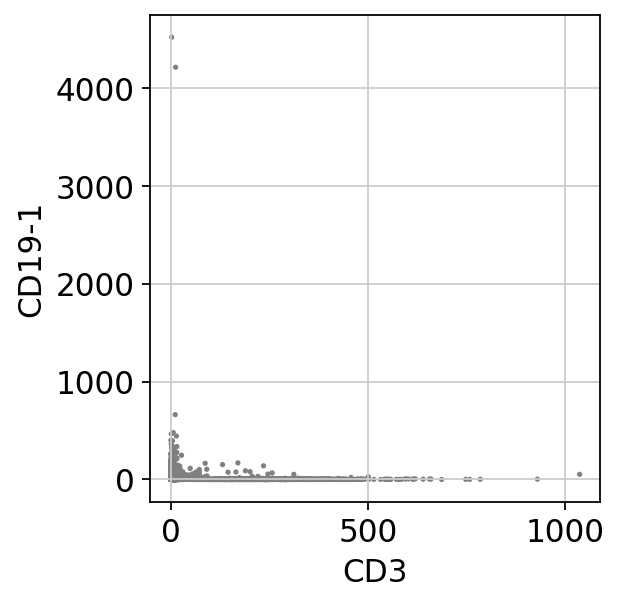

In [269]:
#without normalization
sc.pl.scatter(test, x="CD3", y="CD19-1",layers='counts')

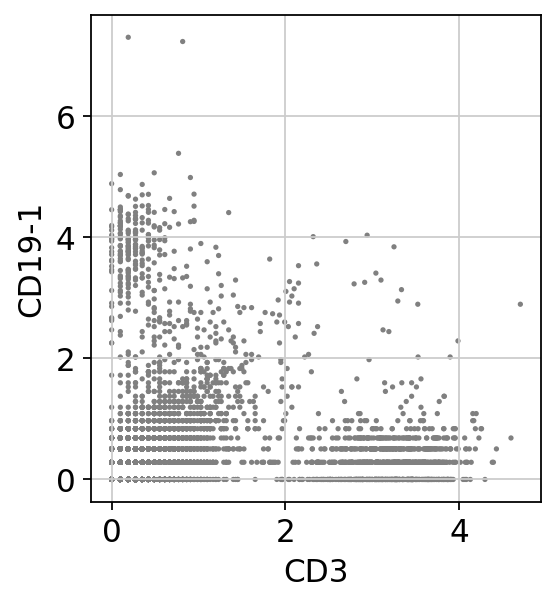

In [270]:
#CLR normalization
sc.pl.scatter(test, x="CD3", y="CD19-1")

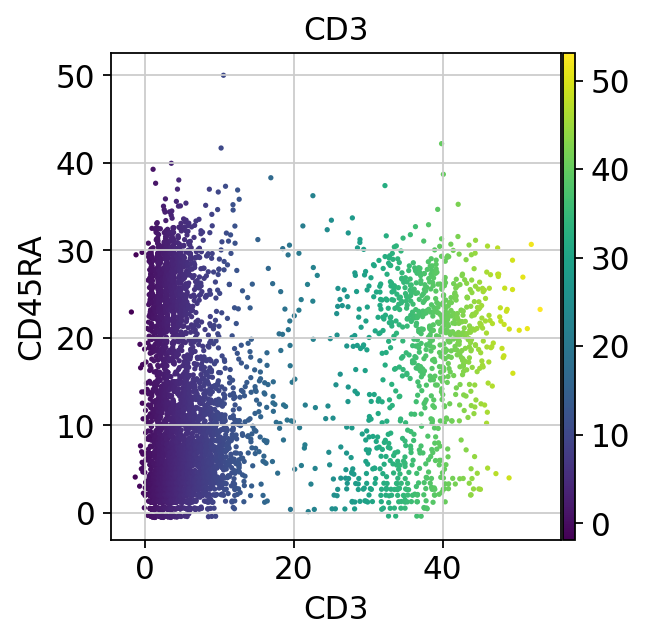

In [271]:
#dsb normalization
sc.pl.scatter(test, x="CD3", y="CD45RA",layers='dsb',color='CD3',
              save='HBM_CD3_CD45RA')

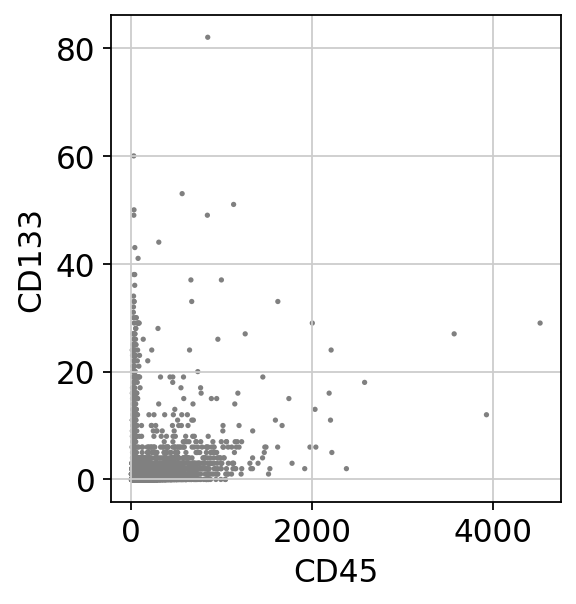

In [272]:
#without normalization
sc.pl.scatter(test, x="CD45", y="CD133",layers='counts')

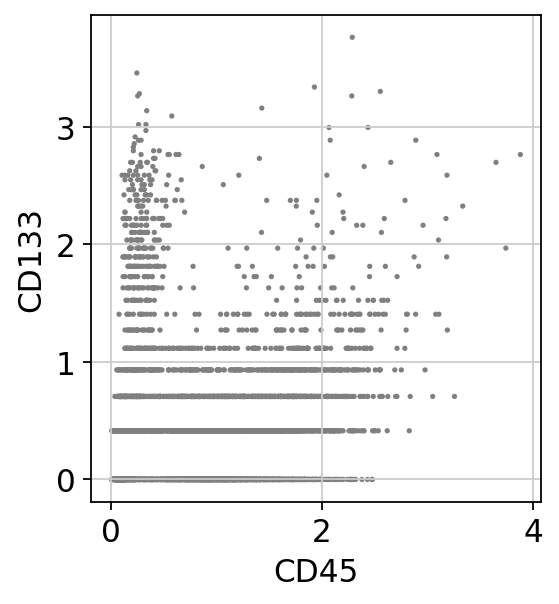

In [273]:
#CLR normalization
sc.pl.scatter(test, x="CD45", y="CD133")

In [ ]:
# load HealthyBM1 and HealthyBM2 orignal data again

In [276]:
HealthyBM1 = mu.read_10x_mtx(
    file_load_path+'BM1-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

... writing an h5ad cache file to speedup reading next time


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


In [277]:
HealthyBM2 = mu.read_10x_mtx(
    file_load_path+'BM2-CSF-GEX/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)    

... writing an h5ad cache file to speedup reading next time


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


In [ ]:
#Run dsb normalization for each sample

In [279]:
HealthyBM1_prot=muno_dsb_protein(HealthyBM1.mod['prot'], HealthyBM1_raw.mod['prot'])
HealthyBM2_prot=muno_dsb_protein(HealthyBM2.mod['prot'], HealthyBM2_raw.mod['prot'])

/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(
/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(


In [280]:
AML335_prot=muno_dsb_protein(AML335.mod['prot'], AML335_raw.mod['prot'])
AML647_prot=muno_dsb_protein(AML647.mod['prot'], AML647_raw.mod['prot'])
AML882_prot=muno_dsb_protein(AML882.mod['prot'], AML882_raw.mod['prot'])
AML948_prot=muno_dsb_protein(AML948.mod['prot'], AML948_raw.mod['prot'])
AML1355_prot=muno_dsb_protein(AML1355.mod['prot'], AML1355_raw.mod['prot'])
AML3082_prot=muno_dsb_protein(AML3082.mod['prot'], AML3082_raw.mod['prot'])
AML3121_prot=muno_dsb_protein(AML3121.mod['prot'], AML3121_raw.mod['prot'])
AML3210_prot=muno_dsb_protein(AML3210.mod['prot'], AML3210_raw.mod['prot'])
AML3371_prot=muno_dsb_protein(AML3371.mod['prot'], AML3371_raw.mod['prot'])
AML3492_prot=muno_dsb_protein(AML3492.mod['prot'], AML3492_raw.mod['prot'])
AML4000_prot=muno_dsb_protein(AML4000.mod['prot'], AML4000_raw.mod['prot'])
AML4010_prot=muno_dsb_protein(AML4010.mod['prot'], AML4010_raw.mod['prot'])
AML4035_prot=muno_dsb_protein(AML4035.mod['prot'], AML4035_raw.mod['prot'])
AML4048_prot=muno_dsb_protein(AML4048.mod['prot'], AML4048_raw.mod['prot'])
AML4062_prot=muno_dsb_protein(AML4062.mod['prot'], AML4062_raw.mod['prot'])
AML4068_prot=muno_dsb_protein(AML4068.mod['prot'], AML4068_raw.mod['prot'])
AML4090_prot=muno_dsb_protein(AML4090.mod['prot'], AML4090_raw.mod['prot'])
AML4102_prot=muno_dsb_protein(AML4102.mod['prot'], AML4102_raw.mod['prot'])
AML4116_prot=muno_dsb_protein(AML4116.mod['prot'], AML4116_raw.mod['prot'])
AML4127_prot=muno_dsb_protein(AML4127.mod['prot'], AML4127_raw.mod['prot'])
AML4192_prot=muno_dsb_protein(AML4192.mod['prot'], AML4192_raw.mod['prot'])
AML4226_prot=muno_dsb_protein(AML4226.mod['prot'], AML4226_raw.mod['prot'])
AML4232_prot=muno_dsb_protein(AML4232.mod['prot'], AML4232_raw.mod['prot'])
AML4239_prot=muno_dsb_protein(AML4239.mod['prot'], AML4239_raw.mod['prot'])
AML4264_prot=muno_dsb_protein(AML4264.mod['prot'], AML4264_raw.mod['prot'])
AML4271_prot=muno_dsb_protein(AML4271.mod['prot'], AML4271_raw.mod['prot'])
AML4304_prot=muno_dsb_protein(AML4304.mod['prot'], AML4304_raw.mod['prot'])
AML4363_prot=muno_dsb_protein(AML4363.mod['prot'], AML4363_raw.mod['prot'])

/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(
/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(
/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(
/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(
/oak

In [1]:
#scatter plot for each antibody to set positive threshold

In [ ]:
Antibody_list=[
'CD274-1',
'CD45',
'CD3',
'CD19-1',
'CD33-1',
'CD90',
'CD10',
'CD45RA',
'CD123',
'CD7-1',
'CD49f',
'CD25',
'CD279',
'CD32',
'CD152',
'CD366',
'CD235ab',
'CD127',
'CD71',
'CD36-1',
'CD133',]

In [ ]:
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(-5, 50, 5)
minor_ticks = np.arange(-5, 50, 1)

In [ ]:
for marker in Antibody_list:
    ax=sc.pl.scatter(HealthyBM1_prot, x="CD71", y=marker, color=marker, show=False)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor = True)
    for label in ax.get_xticklabels():
        #label.set_ha("right")
        label.set_rotation(90)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor = True)

In [281]:
# HealthyBM1_prot: CD19-1 >25
CD19_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD19-1'].X > 25, :].obs.index.tolist()
HealthyBM1_prot.obs['CD19_pos']=0
HealthyBM1_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# HealthyBM1_prot: CD274 >3 
CD274_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD274-1'].X > 15, :].obs.index.tolist()
HealthyBM1_prot.obs['CD274_pos']=0
HealthyBM1_prot.obs['CD274_pos'].loc[CD274_pos] =1
# HealthyBM1_prot: CD3 >20
CD3_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
HealthyBM1_prot.obs['CD3_pos']=0
HealthyBM1_prot.obs['CD3_pos'].loc[CD3_pos] =1
# HealthyBM1_prot: CD33 >10
CD33_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
HealthyBM1_prot.obs['CD33_pos']=0
HealthyBM1_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# HealthyBM1_prot: CD90 >15
CD90_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD90'].X > 15, :].obs.index.tolist()
HealthyBM1_prot.obs['CD90_pos']=0
HealthyBM1_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# HealthyBM1_prot: CD10 >20
CD10_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD10'].X > 20, :].obs.index.tolist()
HealthyBM1_prot.obs['CD10_pos']=0
HealthyBM1_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# HealthyBM1_prot: CD45RA >10
CD45RA_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD45RA'].X > 10, :].obs.index.tolist()
HealthyBM1_prot.obs['CD45RA_pos']=0
HealthyBM1_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# HealthyBM1_prot: CD123 >25
CD123_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
HealthyBM1_prot.obs['CD123_pos']=0
HealthyBM1_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# HealthyBM1_prot: CD7 >20
CD7_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
HealthyBM1_prot.obs['CD7_pos']=0
HealthyBM1_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# HealthyBM1_prot: CD49f >20
CD49f_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD49f'].X >20, :].obs.index.tolist()
HealthyBM1_prot.obs['CD49f_pos']=0
HealthyBM1_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
# HealthyBM1_prot: CD25 >15
CD25_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD25'].X > 15, :].obs.index.tolist()
HealthyBM1_prot.obs['CD25_pos']=0
HealthyBM1_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# HealthyBM1_prot: CD279 >10
CD279_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
HealthyBM1_prot.obs['CD279_pos']=0
HealthyBM1_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# HealthyBM1_prot: CD32 >20
CD32_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD32'].X > 15, :].obs.index.tolist()
HealthyBM1_prot.obs['CD32_pos']=0
HealthyBM1_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# HealthyBM1_prot: CD152>10
CD152_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
HealthyBM1_prot.obs['CD152_pos']=0
HealthyBM1_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# HealthyBM1_prot: CD366 >20
CD366_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD366'].X > 20, :].obs.index.tolist()
HealthyBM1_prot.obs['CD366_pos']=0
HealthyBM1_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# HealthyBM1_prot: CD235ab>15
CD235ab_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
HealthyBM1_prot.obs['CD235ab_pos']=0
HealthyBM1_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# HealthyBM1_prot: CD127>20
CD127_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD127'].X > 20, :].obs.index.tolist()
HealthyBM1_prot.obs['CD127_pos']=0
HealthyBM1_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# HealthyBM1_prot: CD71 >20
CD71_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD71'].X > 20, :].obs.index.tolist()
HealthyBM1_prot.obs['CD71_pos']=0
HealthyBM1_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# HealthyBM1_prot: CD36 >10
CD36_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
HealthyBM1_prot.obs['CD36_pos']=0
HealthyBM1_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# HealthyBM1_prot: CD133 >15
CD133_pos=HealthyBM1_prot[HealthyBM1_prot[: , 'CD133'].X > 15, :].obs.index.tolist()
HealthyBM1_prot.obs['CD133_pos']=0
HealthyBM1_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [282]:
# HealthyBM2_prot: CD19-1 >10
CD19_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD19-1'].X > 12.5, :].obs.index.tolist()
HealthyBM2_prot.obs['CD19_pos']= 0
HealthyBM2_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# HealthyBM2_prot: CD274 >10 
CD274_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD274_pos']= 0
HealthyBM2_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# HealthyBM2_prot: CD3 >10
CD3_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD3'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD3_pos']= 0
HealthyBM2_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# HealthyBM2_prot: CD33 >10
CD33_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD33_pos']= 0
HealthyBM2_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# HealthyBM2_prot: CD90 >10
CD90_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD90_pos']=0
HealthyBM2_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# HealthyBM2_prot: CD10 >10
CD10_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD10_pos']=0
HealthyBM2_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# HealthyBM2_prot: CD45RA 5
CD45RA_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD45RA'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD45RA_pos']=0
HealthyBM2_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# HealthyBM2_prot: CD123 >20
CD123_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD123_pos']=0
HealthyBM2_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# HealthyBM2_prot: CD7 >10
CD7_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD7_pos']=0
HealthyBM2_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# HealthyBM2_prot: CD49f >10
CD49f_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD49f_pos']=0
HealthyBM2_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
# HealthyBM2_prot: CD25 >10
CD25_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD25_pos']=0
HealthyBM2_prot.obs['CD25_pos'].loc[CD25_pos] =1
# HealthyBM2_prot: CD279 >8
CD279_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD279'].X > 8, :].obs.index.tolist()
HealthyBM2_prot.obs['CD279_pos']=0
HealthyBM2_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# HealthyBM2_prot: CD32 >10
CD32_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD32_pos']=0
HealthyBM2_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# HealthyBM2_prot: CD152>10
CD152_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD152_pos']=0
HealthyBM2_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# HealthyBM2_prot: CD366 >10
CD366_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD366_pos']=0
HealthyBM2_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# HealthyBM2_prot: CD235ab>10
CD235ab_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD235ab_pos']=0
HealthyBM2_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# HealthyBM2_prot: CD127>15
CD127_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD127'].X > 15, :].obs.index.tolist()
HealthyBM2_prot.obs['CD127_pos']=0
HealthyBM2_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# HealthyBM2_prot: CD71 >10
CD71_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD71_pos']=0
HealthyBM2_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# HealthyBM2_prot: CD36 >10
CD36_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD36_pos']=0
HealthyBM2_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# HealthyBM2_prot: CD133 >10
CD133_pos=HealthyBM2_prot[HealthyBM2_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
HealthyBM2_prot.obs['CD133_pos']=0
HealthyBM2_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [283]:
# AML335_prot: CD19-1 >15
CD19_pos=AML335_prot[AML335_prot[: , 'CD19-1'].X > 15, :].obs.index.tolist()
AML335_prot.obs['CD19_pos']=0
AML335_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML335_prot: CD274 >15
CD274_pos=AML335_prot[AML335_prot[: , 'CD274-1'].X > 15, :].obs.index.tolist()
AML335_prot.obs['CD274_pos']=0
AML335_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML335_prot: CD3 >40
CD3_pos=AML335_prot[AML335_prot[: , 'CD3'].X > 40, :].obs.index.tolist()
AML335_prot.obs['CD3_pos']=0
AML335_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML335_prot: CD33 >10
CD33_pos=AML335_prot[AML335_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML335_prot.obs['CD33_pos']=0
AML335_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML335_prot: CD90 >15
CD90_pos=AML335_prot[AML335_prot[: , 'CD90'].X > 15, :].obs.index.tolist()
AML335_prot.obs['CD90_pos']=0
AML335_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML335_prot: CD10 >20
CD10_pos=AML335_prot[AML335_prot[: , 'CD10'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD10_pos']=0
AML335_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML335_prot: CD45RA >7
CD45RA_pos=AML335_prot[AML335_prot[: , 'CD45RA'].X > 7, :].obs.index.tolist()
AML335_prot.obs['CD45RA_pos']=0
AML335_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML335_prot: CD123 >10
CD123_pos=AML335_prot[AML335_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML335_prot.obs['CD123_pos']=0
AML335_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML335_prot: CD7 >20
CD7_pos=AML335_prot[AML335_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD7_pos']=0
AML335_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML335_prot: CD49f >20
CD49f_pos=AML335_prot[AML335_prot[: , 'CD49f'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD49f_pos']=0
AML335_prot.obs['CD49f_pos'].loc[CD49f_pos] =1
#AML335_prot: CD25 >30
CD25_pos=AML335_prot[AML335_prot[: , 'CD25'].X > 30, :].obs.index.tolist()
AML335_prot.obs['CD25_pos']=0
AML335_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML335_prot: CD279 >20
CD279_pos=AML335_prot[AML335_prot[: , 'CD279'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD279_pos']=0
AML335_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML335_prot: CD32 >20
CD32_pos=AML335_prot[AML335_prot[: , 'CD32'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD32_pos']=0
AML335_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML335_prot: CD152>20
CD152_pos=AML335_prot[AML335_prot[: , 'CD152'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD152_pos']=0
AML335_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML335_prot: CD366 >20
CD366_pos=AML335_prot[AML335_prot[: , 'CD366'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD366_pos']=0
AML335_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML335_prot: CD235ab>10
CD235ab_pos=AML335_prot[AML335_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML335_prot.obs['CD235ab_pos']=0
AML335_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML335_prot: CD127>20
CD127_pos=AML335_prot[AML335_prot[: , 'CD127'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD127_pos']=0
AML335_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML335_prot: CD71 >10
CD71_pos=AML335_prot[AML335_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML335_prot.obs['CD71_pos']=0
AML335_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML335_prot: CD36 >30
CD36_pos=AML335_prot[AML335_prot[: , 'CD36-1'].X > 30, :].obs.index.tolist()
AML335_prot.obs['CD36_pos']=0
AML335_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML335_prot: CD133 >20
CD133_pos=AML335_prot[AML335_prot[: , 'CD133'].X > 20, :].obs.index.tolist()
AML335_prot.obs['CD133_pos']=0
AML335_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [284]:
# AML647_prot: CD19-1 >10
CD19_pos=AML647_prot[AML647_prot[: , 'CD19-1'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD19_pos']=0
AML647_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML647_prot: CD274 >10 
CD274_pos=AML647_prot[AML647_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD274_pos']=0
AML647_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML647_prot: CD3 >15
CD3_pos=AML647_prot[AML647_prot[: , 'CD3'].X > 15, :].obs.index.tolist()
AML647_prot.obs['CD3_pos']=0
AML647_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML647_prot: CD33 >10
CD33_pos=AML647_prot[AML647_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD33_pos']=0
AML647_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML647_prot: CD90 >10
CD90_pos=AML647_prot[AML647_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD90_pos']=0
AML647_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML647_prot: CD10 >8
CD10_pos=AML647_prot[AML647_prot[: , 'CD10'].X > 8, :].obs.index.tolist()
AML647_prot.obs['CD10_pos']=0
AML647_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML647_prot: CD45RA >10th 0
CD45RA_pos=AML647_prot[AML647_prot[: , 'CD45RA'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD45RA_pos']=0
AML647_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML647_prot: CD123 >10
CD123_pos=AML647_prot[AML647_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD123_pos']=0
AML647_prot.obs['CD123_pos'].loc[CD123_pos] =1
# AML647_prot: CD7 >8
CD7_pos=AML647_prot[AML647_prot[: , 'CD7-1'].X > 8, :].obs.index.tolist()
AML647_prot.obs['CD7_pos']=0
AML647_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML647_prot: CD49f >10
CD49f_pos=AML647_prot[AML647_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD49f_pos']=0
AML647_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML647_prot: CD25 >10
CD25_pos=AML647_prot[AML647_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD25_pos']=0
AML647_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML647_prot: CD279 >10
CD279_pos=AML647_prot[AML647_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD279_pos']=0
AML647_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML647_prot: CD32 >10
CD32_pos=AML647_prot[AML647_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD32_pos']=0
AML647_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML647_prot: CD152>10
CD152_pos=AML647_prot[AML647_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD152_pos']=0
AML647_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML647_prot: CD366 >15
CD366_pos=AML647_prot[AML647_prot[: , 'CD366'].X > 15, :].obs.index.tolist()
AML647_prot.obs['CD366_pos']=0
AML647_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML647_prot: CD235ab>10
CD235ab_pos=AML647_prot[AML647_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD235ab_pos']=0
AML647_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML647_prot: CD127>10
CD127_pos=AML647_prot[AML647_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD127_pos']=0
AML647_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML647_prot: CD71 >20
CD71_pos=AML647_prot[AML647_prot[: , 'CD71'].X > 20, :].obs.index.tolist()
AML647_prot.obs['CD71_pos']=0
AML647_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML647_prot: CD36 >10
CD36_pos=AML647_prot[AML647_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD36_pos']=0
AML647_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML647_prot: CD133 >10
CD133_pos=AML647_prot[AML647_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML647_prot.obs['CD133_pos']=0
AML647_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [285]:
# AML882_prot: CD19-1 >20
CD19_pos=AML882_prot[AML882_prot[: , 'CD19-1'].X > 20, :].obs.index.tolist()
AML882_prot.obs['CD19_pos']=0
AML882_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML882_prot: CD274 >10 
CD274_pos=AML882_prot[AML882_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD274_pos']=0
AML882_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML882_prot: CD3 >15
CD3_pos=AML882_prot[AML882_prot[: , 'CD3'].X > 15, :].obs.index.tolist()
AML882_prot.obs['CD3_pos']=0
AML882_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML882_prot: CD33 >10
CD33_pos=AML882_prot[AML882_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD33_pos']=0
AML882_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML882_prot: CD90 >10
CD90_pos=AML882_prot[AML882_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD90_pos']=0
AML882_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML882_prot: CD10 >10
CD10_pos=AML882_prot[AML882_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD10_pos']=0
AML882_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML882_prot: CD45RA >
CD45RA_pos=AML882_prot[AML882_prot[: , 'CD45RA'].X >7 , :].obs.index.tolist()
AML882_prot.obs['CD45RA_pos']=0
AML882_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML882_prot: CD123 >10
CD123_pos=AML882_prot[AML882_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD123_pos']=0
AML882_prot.obs['CD123_pos'].loc[CD123_pos] =1
# AML882_prot: CD7 >10
CD7_pos=AML882_prot[AML882_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD7_pos']=0
AML882_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML882_prot: CD49f >8
CD49f_pos=AML882_prot[AML882_prot[: , 'CD49f'].X > 8, :].obs.index.tolist()
AML882_prot.obs['CD49f_pos']=0
AML882_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML882_prot: CD25 >10
CD25_pos=AML882_prot[AML882_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD25_pos']=0
AML882_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML882_prot: CD279 >10
CD279_pos=AML882_prot[AML882_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD279_pos']=0
AML882_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML882_prot: CD32 >8
CD32_pos=AML882_prot[AML882_prot[: , 'CD32'].X > 8, :].obs.index.tolist()
AML882_prot.obs['CD32_pos']=0
AML882_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML882_prot: CD152>15
CD152_pos=AML882_prot[AML882_prot[: , 'CD152'].X > 15, :].obs.index.tolist()
AML882_prot.obs['CD152_pos']=0
AML882_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML882_prot: CD366 >10
CD366_pos=AML882_prot[AML882_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD366_pos']=0
AML882_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML882_prot: CD235ab>10
CD235ab_pos=AML882_prot[AML882_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD235ab_pos']=0
AML882_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML882_prot: CD127>10
CD127_pos=AML882_prot[AML882_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD127_pos']=0
AML882_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML882_prot: CD71 >10
CD71_pos=AML882_prot[AML882_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML882_prot.obs['CD71_pos']=0
AML882_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML882_prot: CD36 >20
CD36_pos=AML882_prot[AML882_prot[: , 'CD36-1'].X > 20, :].obs.index.tolist()
AML882_prot.obs['CD36_pos']=0
AML882_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML882_prot: CD133 >1=20
CD133_pos=AML882_prot[AML882_prot[: , 'CD133'].X > 20, :].obs.index.tolist()
AML882_prot.obs['CD133_pos']=0
AML882_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [286]:
# AML948_prot: CD19-1 >20
CD19_pos=AML948_prot[AML948_prot[: , 'CD19-1'].X > 20, :].obs.index.tolist()
AML948_prot.obs['CD19_pos']=0
AML948_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML948_prot: CD274 >10 
CD274_pos=AML948_prot[AML948_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD274_pos']=0
AML948_prot.obs['CD274_pos'].loc[CD274_pos] =1
# AML948_prot: CD3 >40
CD3_pos=AML948_prot[AML948_prot[: , 'CD3'].X > 40, :].obs.index.tolist()
AML948_prot.obs['CD3_pos']=0
AML948_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML948_prot: CD33 >10
CD33_pos=AML948_prot[AML948_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD33_pos']=0
AML948_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML948_prot: CD90 >15
CD90_pos=AML948_prot[AML948_prot[: , 'CD90'].X > 15, :].obs.index.tolist()
AML948_prot.obs['CD90_pos']=0
AML948_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML948_prot: CD10 >15
CD10_pos=AML948_prot[AML948_prot[: , 'CD10'].X > 15, :].obs.index.tolist()
AML948_prot.obs['CD10_pos']=0
AML948_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML948_prot: CD45RA >10
CD45RA_pos=AML948_prot[AML948_prot[: , 'CD45RA'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD45RA_pos']=0
AML948_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML948_prot: CD123 >10
CD123_pos=AML948_prot[AML948_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD123_pos']=0
AML948_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML948_prot: CD7 >10
CD7_pos=AML948_prot[AML948_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD7_pos']=0
AML948_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML948_prot: CD49f >10
CD49f_pos=AML948_prot[AML948_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD49f_pos']=0
AML948_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML948_prot: CD25 >20
CD25_pos=AML948_prot[AML948_prot[: , 'CD25'].X > 20, :].obs.index.tolist()
AML948_prot.obs['CD25_pos']=0
AML948_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML948_prot: CD279 >10
CD279_pos=AML948_prot[AML948_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD279_pos']=0
AML948_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML948_prot: CD32 >10
CD32_pos=AML948_prot[AML948_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD32_pos']=0
AML948_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML948_prot: CD152>10
CD152_pos=AML948_prot[AML948_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD152_pos']=0
AML948_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML948_prot: CD366 >10
CD366_pos=AML948_prot[AML948_prot[: , 'CD366'].X >10, :].obs.index.tolist()
AML948_prot.obs['CD366_pos']=0
AML948_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML948_prot: CD235ab>10
CD235ab_pos=AML948_prot[AML948_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD235ab_pos']=0
AML948_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML948_prot: CD127>12.5
CD127_pos=AML948_prot[AML948_prot[: , 'CD127'].X > 12.5, :].obs.index.tolist()
AML948_prot.obs['CD127_pos']=0
AML948_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML948_prot: CD71 >10
CD71_pos=AML948_prot[AML948_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML948_prot.obs['CD71_pos']=0
AML948_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML948_prot: CD36 >20
CD36_pos=AML948_prot[AML948_prot[: , 'CD36-1'].X > 20, :].obs.index.tolist()
AML948_prot.obs['CD36_pos']=0
AML948_prot.obs['CD36_pos'].loc[CD36_pos] =1
# AML948_prot: CD133 >20
CD133_pos=AML948_prot[AML948_prot[: , 'CD133'].X > 20, :].obs.index.tolist()
AML948_prot.obs['CD133_pos']=0
AML948_prot.obs['CD133_pos'].loc[CD133_pos] =1

In [287]:
# AML1355_prot: CD19-1 >15
CD19_pos=AML1355_prot[AML1355_prot[: , 'CD19-1'].X > 20, :].obs.index.tolist()
AML1355_prot.obs['CD19_pos']=0
AML1355_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML1355_prot: CD274 >10 
CD274_pos=AML1355_prot[AML1355_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD274_pos']=0
AML1355_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML1355_prot: CD3 >40
CD3_pos=AML1355_prot[AML1355_prot[: , 'CD3'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD3_pos']=0
AML1355_prot.obs['CD3_pos'].loc[CD3_pos] =1
# AML1355_prot: CD33 >5
CD33_pos=AML1355_prot[AML1355_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD33_pos']=0
AML1355_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML1355_prot: CD90 >10
CD90_pos=AML1355_prot[AML1355_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD90_pos']=0
AML1355_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML1355_prot: CD10 >10
CD10_pos=AML1355_prot[AML1355_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD10_pos']=0
AML1355_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML1355_prot: CD45RA >8
CD45RA_pos=AML1355_prot[AML1355_prot[: , 'CD45RA'].X > 20, :].obs.index.tolist()
AML1355_prot.obs['CD45RA_pos']=0
AML1355_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML1355_prot: CD123 >8
CD123_pos=AML1355_prot[AML1355_prot[: , 'CD123'].X >6, :].obs.index.tolist()
AML1355_prot.obs['CD123_pos']=0
AML1355_prot.obs['CD123_pos'].loc[CD123_pos] =1
# AML1355_prot: CD7 >10
CD7_pos=AML1355_prot[AML1355_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML1355_prot.obs['CD7_pos']=0
AML1355_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML1355_prot: CD49f >10
CD49f_pos=AML1355_prot[AML1355_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD49f_pos']=0
AML1355_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML1355_prot: CD25 >10
CD25_pos=AML1355_prot[AML1355_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD25_pos']=0
AML1355_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML1355_prot: CD279 >10
CD279_pos=AML1355_prot[AML1355_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD279_pos']=0
AML1355_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML1355_prot: CD32 >8
CD32_pos=AML1355_prot[AML1355_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD32_pos']=0
AML1355_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML1355_prot: CD152>10
CD152_pos=AML1355_prot[AML1355_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD152_pos']=0
AML1355_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML1355_prot: CD366 >10
CD366_pos=AML1355_prot[AML1355_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD366_pos']=0
AML1355_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML1355_prot: CD235ab>10
CD235ab_pos=AML1355_prot[AML1355_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD235ab_pos']=0
AML1355_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML1355_prot: CD127>10
CD127_pos=AML1355_prot[AML1355_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD127_pos']=0
AML1355_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML1355_prot: CD71 >20
CD71_pos=AML1355_prot[AML1355_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD71_pos']=0
AML1355_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML1355_prot: CD36 >10
CD36_pos=AML1355_prot[AML1355_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD36_pos']=0
AML1355_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML1355_prot: CD133 >10
CD133_pos=AML1355_prot[AML1355_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML1355_prot.obs['CD133_pos']=0
AML1355_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [288]:
# AML3082_prot: CD19-1 >20
CD19_pos=AML3082_prot[AML3082_prot[: , 'CD19-1'].X > 20, :].obs.index.tolist()
AML3082_prot.obs['CD19_pos']=0
AML3082_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML3082_prot: CD274 >10 
CD274_pos=AML3082_prot[AML3082_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD274_pos']=0
AML3082_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML3082_prot: CD3 >20
CD3_pos=AML3082_prot[AML3082_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
AML3082_prot.obs['CD3_pos']=0
AML3082_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML3082_prot: CD33 >10
CD33_pos=AML3082_prot[AML3082_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD33_pos']=0
AML3082_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML3082_prot: CD90 >10
CD90_pos=AML3082_prot[AML3082_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD90_pos']=0
AML3082_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML3082_prot: CD10 >10
CD10_pos=AML3082_prot[AML3082_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD10_pos']=0
AML3082_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML3082_prot: CD45RA >10
CD45RA_pos=AML3082_prot[AML3082_prot[: , 'CD45RA'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD45RA_pos']=0
AML3082_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML3082_prot: CD123 >10
CD123_pos=AML3082_prot[AML3082_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD123_pos']=0
AML3082_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML3082_prot: CD7 >20
CD7_pos=AML3082_prot[AML3082_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML3082_prot.obs['CD7_pos']=0
AML3082_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML3082_prot: CD49f >15
CD49f_pos=AML3082_prot[AML3082_prot[: , 'CD49f'].X > 15, :].obs.index.tolist()
AML3082_prot.obs['CD49f_pos']=0
AML3082_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML3082_prot: CD25 >15
CD25_pos=AML3082_prot[AML3082_prot[: , 'CD25'].X > 15, :].obs.index.tolist()
AML3082_prot.obs['CD25_pos']=0
AML3082_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML3082_prot: CD279 >20
CD279_pos=AML3082_prot[AML3082_prot[: , 'CD279'].X > 20, :].obs.index.tolist()
AML3082_prot.obs['CD279_pos']=0
AML3082_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML3082_prot: CD32 >10
CD32_pos=AML3082_prot[AML3082_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD32_pos']=0
AML3082_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML3082_prot: CD152>10
CD152_pos=AML3082_prot[AML3082_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD152_pos']=0
AML3082_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML3082_prot: CD366 >20
CD366_pos=AML3082_prot[AML3082_prot[: , 'CD366'].X > 20, :].obs.index.tolist()
AML3082_prot.obs['CD366_pos']=0
AML3082_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML3082_prot: CD235ab>10
CD235ab_pos=AML3082_prot[AML3082_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD235ab_pos']=0
AML3082_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML3082_prot: CD127>10
CD127_pos=AML3082_prot[AML3082_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD127_pos']=0
AML3082_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML3082_prot: CD71 >20
CD71_pos=AML3082_prot[AML3082_prot[: , 'CD71'].X > 20, :].obs.index.tolist()
AML3082_prot.obs['CD71_pos']=0
AML3082_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML3082_prot: CD36 >25
CD36_pos=AML3082_prot[AML3082_prot[: , 'CD36-1'].X > 25, :].obs.index.tolist()
AML3082_prot.obs['CD36_pos']=0
AML3082_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML3082_prot: CD133 >10
CD133_pos=AML3082_prot[AML3082_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML3082_prot.obs['CD133_pos']=0
AML3082_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [289]:
# AML3121_prot: CD19-1 >10
CD19_pos=AML3121_prot[AML3121_prot[: , 'CD19-1'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD19_pos']=0
AML3121_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML3121_prot: CD274 >10 
CD274_pos=AML3121_prot[AML3121_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD274_pos']=0
AML3121_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML3121_prot: CD3 >20
CD3_pos=AML3121_prot[AML3121_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
AML3121_prot.obs['CD3_pos']=0
AML3121_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML3121_prot: CD33 >20
CD33_pos=AML3121_prot[AML3121_prot[: , 'CD33-1'].X > 20, :].obs.index.tolist()
AML3121_prot.obs['CD33_pos']=0
AML3121_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML3121_prot: CD90 >10
CD90_pos=AML3121_prot[AML3121_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD90_pos']=0
AML3121_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML3121_prot: CD10 >10
CD10_pos=AML3121_prot[AML3121_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD10_pos']=0
AML3121_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML3121_prot: CD45RA>6
CD45RA_pos=AML3121_prot[AML3121_prot[: , 'CD45RA'].X > 2, :].obs.index.tolist()
AML3121_prot.obs['CD45RA_pos']=0
AML3121_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML3121_prot: CD123 >10
CD123_pos=AML3121_prot[AML3121_prot[: , 'CD123'].X > 6, :].obs.index.tolist()
AML3121_prot.obs['CD123_pos']=0
AML3121_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML3121_prot: CD7 >10
CD7_pos=AML3121_prot[AML3121_prot[: , 'CD7-1'].X > 5, :].obs.index.tolist()
AML3121_prot.obs['CD7_pos']=0
AML3121_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML3121_prot: CD49f >15
CD49f_pos=AML3121_prot[AML3121_prot[: , 'CD49f'].X > 5, :].obs.index.tolist()
AML3121_prot.obs['CD49f_pos']=0
AML3121_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML3121_prot: CD25 >10
CD25_pos=AML3121_prot[AML3121_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD25_pos']=0
AML3121_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML3121_prot: CD279 >10
CD279_pos=AML3121_prot[AML3121_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD279_pos']=0
AML3121_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML3121_prot: CD32 >20
CD32_pos=AML3121_prot[AML3121_prot[: , 'CD32'].X > 20, :].obs.index.tolist()
AML3121_prot.obs['CD32_pos']=0
AML3121_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML3121_prot: CD152>10
CD152_pos=AML3121_prot[AML3121_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD152_pos']=0
AML3121_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML3121_prot: CD366 >15
CD366_pos=AML3121_prot[AML3121_prot[: , 'CD366'].X > 15, :].obs.index.tolist()
AML3121_prot.obs['CD366_pos']=0
AML3121_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML3121_prot: CD235ab>10
CD235ab_pos=AML3121_prot[AML3121_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD235ab_pos']=0
AML3121_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML3121_prot: CD127>10
CD127_pos=AML3121_prot[AML3121_prot[: , 'CD127'].X > 15, :].obs.index.tolist()
AML3121_prot.obs['CD127_pos']=0
AML3121_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML3121_prot: CD71 >10
CD71_pos=AML3121_prot[AML3121_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD71_pos']=0
AML3121_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML3121_prot: CD36 >25
CD36_pos=AML3121_prot[AML3121_prot[: , 'CD36-1'].X > 25, :].obs.index.tolist()
AML3121_prot.obs['CD36_pos']=0
AML3121_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML3121_prot: CD133 >10
CD133_pos=AML3121_prot[AML3121_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML3121_prot.obs['CD133_pos']=0
AML3121_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [290]:
# AML3210_prot: CD19-1 >25
CD19_pos=AML3210_prot[AML3210_prot[: , 'CD19-1'].X > 25, :].obs.index.tolist()
AML3210_prot.obs['CD19_pos']=0
AML3210_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML3210_prot: CD274 >10 
CD274_pos=AML3210_prot[AML3210_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD274_pos']=0
AML3210_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML3210_prot: CD3 >20
CD3_pos=AML3210_prot[AML3210_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
AML3210_prot.obs['CD3_pos']=0
AML3210_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML3210_prot: CD33 >10
CD33_pos=AML3210_prot[AML3210_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD33_pos']=0
AML3210_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML3210_prot: CD90 >10
CD90_pos=AML3210_prot[AML3210_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD90_pos']=0
AML3210_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML3210_prot: CD10 >10
CD10_pos=AML3210_prot[AML3210_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD10_pos']=0
AML3210_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML3210_prot: CD45RA>20
CD45RA_pos=AML3210_prot[AML3210_prot[: , 'CD45RA'].X > 20, :].obs.index.tolist()
AML3210_prot.obs['CD45RA_pos']=0
AML3210_prot.obs['CD45RA_pos'].loc[CD45RA_pos] =1
# AML3210_prot: CD123 >10
CD123_pos=AML3210_prot[AML3210_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD123_pos']=0
AML3210_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML3210_prot: CD7 >20
CD7_pos=AML3210_prot[AML3210_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML3210_prot.obs['CD7_pos']=0
AML3210_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML3210_prot: CD49f >10
CD49f_pos=AML3210_prot[AML3210_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD49f_pos']=0
AML3210_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML3210_prot: CD25 >10
CD25_pos=AML3210_prot[AML3210_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD25_pos']=0
AML3210_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML3210_prot: CD279 >10
CD279_pos=AML3210_prot[AML3210_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD279_pos']=0
AML3210_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML3210_prot: CD32 >10
CD32_pos=AML3210_prot[AML3210_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD32_pos']=0
AML3210_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML3210_prot: CD152>10
CD152_pos=AML3210_prot[AML3210_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD152_pos']=0
AML3210_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML3210_prot: CD366 >20
CD366_pos=AML3210_prot[AML3210_prot[: , 'CD366'].X > 20, :].obs.index.tolist()
AML3210_prot.obs['CD366_pos']=0
AML3210_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML3210_prot: CD235ab>10
CD235ab_pos=AML3210_prot[AML3210_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD235ab_pos']=0
AML3210_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML3210_prot: CD127>10
CD127_pos=AML3210_prot[AML3210_prot[: , 'CD127'].X > 20, :].obs.index.tolist()
AML3210_prot.obs['CD127_pos']=0
AML3210_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML3210_prot: CD71 >20
CD71_pos=AML3210_prot[AML3210_prot[: , 'CD71'].X > 20, :].obs.index.tolist()
AML3210_prot.obs['CD71_pos']=0
AML3210_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML3210_prot: CD36 >10
CD36_pos=AML3210_prot[AML3210_prot[: , 'CD36-1'].X > 20, :].obs.index.tolist()
AML3210_prot.obs['CD36_pos']=0
AML3210_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML3210_prot: CD133 >10
CD133_pos=AML3210_prot[AML3210_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML3210_prot.obs['CD133_pos']=0
AML3210_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [291]:
# AML3371_prot: CD19-1 >20
CD19_pos=AML3371_prot[AML3371_prot[: , 'CD19-1'].X > 20, :].obs.index.tolist()
AML3371_prot.obs['CD19_pos']=0
AML3371_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML3371_prot: CD274 >15
CD274_pos=AML3371_prot[AML3371_prot[: , 'CD274-1'].X > 15, :].obs.index.tolist()
AML3371_prot.obs['CD274_pos']=0
AML3371_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML3371_prot: CD3 >25
CD3_pos=AML3371_prot[AML3371_prot[: , 'CD3'].X > 25, :].obs.index.tolist()
AML3371_prot.obs['CD3_pos']=0
AML3371_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML3371_prot: CD33 >7
CD33_pos=AML3371_prot[AML3371_prot[: , 'CD33-1'].X > 7, :].obs.index.tolist()
AML3371_prot.obs['CD33_pos']=0
AML3371_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML3371_prot: CD90 >15
CD90_pos=AML3371_prot[AML3371_prot[: , 'CD90'].X > 15, :].obs.index.tolist()
AML3371_prot.obs['CD90_pos']=0
AML3371_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML3371_prot: CD10 >2
CD10_pos=AML3371_prot[AML3371_prot[: , 'CD10'].X > 20, :].obs.index.tolist()
AML3371_prot.obs['CD10_pos']=0
AML3371_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML3371_prot: CD45RA>10
CD45RA_pos=AML3371_prot[AML3371_prot[: , 'CD45RA'].X > 10, :].obs.index.tolist()
AML3371_prot.obs['CD45RA_pos']=0
AML3371_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML3371_prot: CD123 >8
CD123_pos=AML3371_prot[AML3371_prot[: , 'CD123'].X > 8, :].obs.index.tolist()
AML3371_prot.obs['CD123_pos']=0
AML3371_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML3371_prot: CD7 >25
CD7_pos=AML3371_prot[AML3371_prot[: , 'CD7-1'].X > 25, :].obs.index.tolist()
AML3371_prot.obs['CD7_pos']=0
AML3371_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML3371_prot: CD49f >10
CD49f_pos=AML3371_prot[AML3371_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML3371_prot.obs['CD49f_pos']=0
AML3371_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML3371_prot: CD25 >10
CD25_pos=AML3371_prot[AML3371_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML3371_prot.obs['CD25_pos']=0
AML3371_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML3371_prot: CD279 >10
CD279_pos=AML3371_prot[AML3371_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML3371_prot.obs['CD279_pos']=0
AML3371_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML3371_prot: CD32 >15
CD32_pos=AML3371_prot[AML3371_prot[: , 'CD32'].X > 15, :].obs.index.tolist()
AML3371_prot.obs['CD32_pos']=0
AML3371_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML3371_prot: CD152>15
CD152_pos=AML3371_prot[AML3371_prot[: , 'CD152'].X > 15, :].obs.index.tolist()
AML3371_prot.obs['CD152_pos']=0
AML3371_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML3371_prot: CD366 >20
CD366_pos=AML3371_prot[AML3371_prot[: , 'CD366'].X > 20, :].obs.index.tolist()
AML3371_prot.obs['CD366_pos']=0
AML3371_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML3371_prot: CD235ab>10
CD235ab_pos=AML3371_prot[AML3371_prot[: , 'CD235ab'].X >10, :].obs.index.tolist()
AML3371_prot.obs['CD235ab_pos']=0
AML3371_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML3371_prot: CD127>20
CD127_pos=AML3371_prot[AML3371_prot[: , 'CD127'].X > 20, :].obs.index.tolist()
AML3371_prot.obs['CD127_pos']=0
AML3371_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML3371_prot: CD71 >20
CD71_pos=AML3371_prot[AML3371_prot[: , 'CD71'].X > 20, :].obs.index.tolist()
AML3371_prot.obs['CD71_pos']=0
AML3371_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML3371_prot: CD36 >25
CD36_pos=AML3371_prot[AML3371_prot[: , 'CD36-1'].X > 25, :].obs.index.tolist()
AML3371_prot.obs['CD36_pos']=0
AML3371_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML3371_prot: CD133 >20
CD133_pos=AML3371_prot[AML3371_prot[: , 'CD133'].X > 20, :].obs.index.tolist()
AML3371_prot.obs['CD133_pos']=0
AML3371_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [292]:
# AML3492_prot: CD19-1 >40
CD19_pos=AML3492_prot[AML3492_prot[: , 'CD19-1'].X > 15, :].obs.index.tolist()
AML3492_prot.obs['CD19_pos']=0
AML3492_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML3492_prot: CD274 >10
CD274_pos=AML3492_prot[AML3492_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD274_pos']=0
AML3492_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML3492_prot: CD3 >40
CD3_pos=AML3492_prot[AML3492_prot[: , 'CD3'].X > 40, :].obs.index.tolist()
AML3492_prot.obs['CD3_pos']=0
AML3492_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML3492_prot: CD33 >10
CD33_pos=AML3492_prot[AML3492_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD33_pos']=0
AML3492_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML3492_prot: CD90 >10
CD90_pos=AML3492_prot[AML3492_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD90_pos']=0
AML3492_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML3492_prot: CD10 >15
CD10_pos=AML3492_prot[AML3492_prot[: , 'CD10'].X > 15, :].obs.index.tolist()
AML3492_prot.obs['CD10_pos']=0
AML3492_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML3492_prot: CD45RA>10
CD45RA_pos=AML3492_prot[AML3492_prot[: , 'CD45RA'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD45RA_pos']=0
AML3492_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML3492_prot: CD123 >10
CD123_pos=AML3492_prot[AML3492_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD123_pos']=0
AML3492_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML3492_prot: CD7 >25
CD7_pos=AML3492_prot[AML3492_prot[: , 'CD7-1'].X > 25, :].obs.index.tolist()
AML3492_prot.obs['CD7_pos']=0
AML3492_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML3492_prot: CD49f >10
CD49f_pos=AML3492_prot[AML3492_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD49f_pos']=0
AML3492_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML3492_prot: CD25 >10
CD25_pos=AML3492_prot[AML3492_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD25_pos']=0
AML3492_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML3492_prot: CD279 >10
CD279_pos=AML3492_prot[AML3492_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD279_pos']=0
AML3492_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML3492_prot: CD32 >10
CD32_pos=AML3492_prot[AML3492_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD32_pos']=0
AML3492_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML3492_prot: CD152>10
CD152_pos=AML3492_prot[AML3492_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD152_pos']=0
AML3492_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML3492_prot: CD366 >10
CD366_pos=AML3492_prot[AML3492_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD366_pos']=0
AML3492_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML3492_prot: CD235ab>20
CD235ab_pos=AML3492_prot[AML3492_prot[: , 'CD235ab'].X > 20, :].obs.index.tolist()
AML3492_prot.obs['CD235ab_pos']=0
AML3492_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML3492_prot: CD127>10
CD127_pos=AML3492_prot[AML3492_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML3492_prot.obs['CD127_pos']=0
AML3492_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML3492_prot: CD71 >20
CD71_pos=AML3492_prot[AML3492_prot[: , 'CD71'].X > 20, :].obs.index.tolist()
AML3492_prot.obs['CD71_pos']=0
AML3492_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML3492_prot: CD36 >20
CD36_pos=AML3492_prot[AML3492_prot[: , 'CD36-1'].X > 20, :].obs.index.tolist()
AML3492_prot.obs['CD36_pos']=0
AML3492_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML3492_prot: CD133 >20
CD133_pos=AML3492_prot[AML3492_prot[: , 'CD133'].X > 20, :].obs.index.tolist()
AML3492_prot.obs['CD133_pos']=0
AML3492_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [293]:
# AML4000_prot: CD19-1 >10
CD19_pos=AML4000_prot[AML4000_prot[: , 'CD19-1'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD19_pos']=0
AML4000_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4000_prot: CD274 >10
CD274_pos=AML4000_prot[AML4000_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD274_pos']=0
AML4000_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4000_prot: CD3 >20
CD3_pos=AML4000_prot[AML4000_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
AML4000_prot.obs['CD3_pos']=0
AML4000_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4000_prot: CD33 >10
CD33_pos=AML4000_prot[AML4000_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD33_pos']=0
AML4000_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4000_prot: CD90 >10
CD90_pos=AML4000_prot[AML4000_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD90_pos']=0
AML4000_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4000_prot: CD10 >10
CD10_pos=AML4000_prot[AML4000_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD10_pos']=0
AML4000_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4000_prot: CD45RA>7
CD45RA_pos=AML4000_prot[AML4000_prot[: , 'CD45RA'].X >7 , :].obs.index.tolist()
AML4000_prot.obs['CD45RA_pos']=0
AML4000_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4000_prot: CD123 >8
CD123_pos=AML4000_prot[AML4000_prot[: , 'CD123'].X > 8, :].obs.index.tolist()
AML4000_prot.obs['CD123_pos']=0
AML4000_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4000_prot: CD7 >40
CD7_pos=AML4000_prot[AML4000_prot[: , 'CD7-1'].X > 40, :].obs.index.tolist()
AML4000_prot.obs['CD7_pos']=0
AML4000_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4000_prot: CD49f >15
CD49f_pos=AML4000_prot[AML4000_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD49f_pos']=0
AML4000_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4000_prot: CD25 >10
CD25_pos=AML4000_prot[AML4000_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD25_pos']=0
AML4000_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4000_prot: CD279 >1
CD279_pos=AML4000_prot[AML4000_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD279_pos']=0
AML4000_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4000_prot: CD32 >10
CD32_pos=AML4000_prot[AML4000_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD32_pos']=0
AML4000_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4000_prot: CD152>10
CD152_pos=AML4000_prot[AML4000_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD152_pos']=0
AML4000_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4000_prot: CD366 >15
CD366_pos=AML4000_prot[AML4000_prot[: , 'CD366'].X > 15, :].obs.index.tolist()
AML4000_prot.obs['CD366_pos']=0
AML4000_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4000_prot: CD235ab>10
CD235ab_pos=AML4000_prot[AML4000_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD235ab_pos']=0
AML4000_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4000_prot: CD127>15
CD127_pos=AML4000_prot[AML4000_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD127_pos']=0
AML4000_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4000_prot: CD71 >25
CD71_pos=AML4000_prot[AML4000_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD71_pos']=0
AML4000_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4000_prot: CD36 >10
CD36_pos=AML4000_prot[AML4000_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD36_pos']=0
AML4000_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4000_prot: CD133 >10
CD133_pos=AML4000_prot[AML4000_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4000_prot.obs['CD133_pos']=0
AML4000_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [294]:
# AML4010_prot: CD19-1 >40
CD19_pos=AML4010_prot[AML4010_prot[: , 'CD19-1'].X > 40, :].obs.index.tolist()
AML4010_prot.obs['CD19_pos']=0
AML4010_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4010_prot: CD274 >10
CD274_pos=AML4010_prot[AML4010_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD274_pos']=0
AML4010_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4010_prot: CD3 >25
CD3_pos=AML4010_prot[AML4010_prot[: , 'CD3'].X > 25, :].obs.index.tolist()
AML4010_prot.obs['CD3_pos']=0
AML4010_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4010_prot: CD33 >10
CD33_pos=AML4010_prot[AML4010_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD33_pos']=0
AML4010_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4010_prot: CD90 >10
CD90_pos=AML4010_prot[AML4010_prot[: , 'CD90'].X > 10 , :].obs.index.tolist()
AML4010_prot.obs['CD90_pos']=0
AML4010_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4010_prot: CD10 >10
CD10_pos=AML4010_prot[AML4010_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD10_pos']=0
AML4010_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4010_prot: CD45RA>40
CD45RA_pos=AML4010_prot[AML4010_prot[: , 'CD45RA'].X > 40, :].obs.index.tolist()
AML4010_prot.obs['CD45RA_pos']=0
AML4010_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4010_prot: CD123 >10
CD123_pos=AML4010_prot[AML4010_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD123_pos']=0
AML4010_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4010_prot: CD7 >40
CD7_pos=AML4010_prot[AML4010_prot[: , 'CD7-1'].X > 40, :].obs.index.tolist()
AML4010_prot.obs['CD7_pos']=0
AML4010_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4010_prot: CD49f >15
CD49f_pos=AML4010_prot[AML4010_prot[: , 'CD49f'].X > 8, :].obs.index.tolist()
AML4010_prot.obs['CD49f_pos']=0
AML4010_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4010_prot: CD25 >10
CD25_pos=AML4010_prot[AML4010_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD25_pos']=0
AML4010_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4010_prot: CD279 >1
CD279_pos=AML4010_prot[AML4010_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD279_pos']=0
AML4010_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4010_prot: CD32 >20
CD32_pos=AML4010_prot[AML4010_prot[: , 'CD32'].X > 20, :].obs.index.tolist()
AML4010_prot.obs['CD32_pos']=0
AML4010_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4010_prot: CD152>7.5
CD152_pos=AML4010_prot[AML4010_prot[: , 'CD152'].X > 7.5, :].obs.index.tolist()
AML4010_prot.obs['CD152_pos']=0
AML4010_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4010_prot: CD366 >7.5
CD366_pos=AML4010_prot[AML4010_prot[: , 'CD366'].X > 7.5, :].obs.index.tolist()
AML4010_prot.obs['CD366_pos']=0
AML4010_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4010_prot: CD235ab>20
CD235ab_pos=AML4010_prot[AML4010_prot[: , 'CD235ab'].X > 20, :].obs.index.tolist()
AML4010_prot.obs['CD235ab_pos']=0
AML4010_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4010_prot: CD127>15
CD127_pos=AML4010_prot[AML4010_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD127_pos']=0
AML4010_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4010_prot: CD71 >8
CD71_pos=AML4010_prot[AML4010_prot[: , 'CD71'].X > 8, :].obs.index.tolist()
AML4010_prot.obs['CD71_pos']=0
AML4010_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4010_prot: CD36 >25
CD36_pos=AML4010_prot[AML4010_prot[: , 'CD36-1'].X > 25, :].obs.index.tolist()
AML4010_prot.obs['CD36_pos']=0
AML4010_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4010_prot: CD133 >10
CD133_pos=AML4010_prot[AML4010_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4010_prot.obs['CD133_pos']=0
AML4010_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [295]:
# AML4035_prot: CD19-1 >5
CD19_pos=AML4035_prot[AML4035_prot[: , 'CD19-1'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD19_pos']=0
AML4035_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4035_prot: CD274 >5
CD274_pos=AML4035_prot[AML4035_prot[: , 'CD274-1'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD274_pos']=0
AML4035_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4035_prot: CD3 >6
CD3_pos=AML4035_prot[AML4035_prot[: , 'CD3'].X > 6, :].obs.index.tolist()
AML4035_prot.obs['CD3_pos']=0
AML4035_prot.obs['CD3_pos'].loc[CD3_pos] =1
# AML4035_prot: CD33 >7.5
CD33_pos=AML4035_prot[AML4035_prot[: , 'CD33-1'].X > 7.5, :].obs.index.tolist()
AML4035_prot.obs['CD33_pos']=0
AML4035_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4035_prot: CD90 >5
CD90_pos=AML4035_prot[AML4035_prot[: , 'CD90'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD90_pos']=0
AML4035_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4035_prot: CD10 >5
CD10_pos=AML4035_prot[AML4035_prot[: , 'CD10'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD10_pos']=0
AML4035_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4035_prot: CD45RA>6
CD45RA_pos=AML4035_prot[AML4035_prot[: , 'CD45RA'].X >6, :].obs.index.tolist()
AML4035_prot.obs['CD45RA_pos']=0
AML4035_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4035_prot: CD123 >7
CD123_pos=AML4035_prot[AML4035_prot[: , 'CD123'].X > 6, :].obs.index.tolist()
AML4035_prot.obs['CD123_pos']=0
AML4035_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4035_prot: CD7 >10
CD7_pos=AML4035_prot[AML4035_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML4035_prot.obs['CD7_pos']=0
AML4035_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4035_prot: CD49f >5
CD49f_pos=AML4035_prot[AML4035_prot[: , 'CD49f'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD49f_pos']=0
AML4035_prot.obs['CD49f_pos'].loc[CD49f_pos] =1
#AML4035_prot: CD25 >5
CD25_pos=AML4035_prot[AML4035_prot[: , 'CD25'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD25_pos']=0
AML4035_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4035_prot: CD279 >5
CD279_pos=AML4035_prot[AML4035_prot[: , 'CD279'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD279_pos']=0
AML4035_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4035_prot: CD32 >5
CD32_pos=AML4035_prot[AML4035_prot[: , 'CD32'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD32_pos']=0
AML4035_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4035_prot: CD152>6
CD152_pos=AML4035_prot[AML4035_prot[: , 'CD152'].X > 6, :].obs.index.tolist()
AML4035_prot.obs['CD152_pos']=0
AML4035_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4035_prot: CD366 >5
CD366_pos=AML4035_prot[AML4035_prot[: , 'CD366'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD366_pos']=0
AML4035_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4035_prot: CD235ab>5
CD235ab_pos=AML4035_prot[AML4035_prot[: , 'CD235ab'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD235ab_pos']=0
AML4035_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4035_prot: CD127>6
CD127_pos=AML4035_prot[AML4035_prot[: , 'CD127'].X > 6, :].obs.index.tolist()
AML4035_prot.obs['CD127_pos']=0
AML4035_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4035_prot: CD71 >5
CD71_pos=AML4035_prot[AML4035_prot[: , 'CD71'].X > 5, :].obs.index.tolist()
AML4035_prot.obs['CD71_pos']=0
AML4035_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4035_prot: CD36 >6
CD36_pos=AML4035_prot[AML4035_prot[: , 'CD36-1'].X > 6, :].obs.index.tolist()
AML4035_prot.obs['CD36_pos']=0
AML4035_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4035_prot: CD133 >6
CD133_pos=AML4035_prot[AML4035_prot[: , 'CD133'].X > 6, :].obs.index.tolist()
AML4035_prot.obs['CD133_pos']=0
AML4035_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [296]:
# AML4048_prot: CD19-1 >10
CD19_pos=AML4048_prot[AML4048_prot[: , 'CD19-1'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD19_pos']=0
AML4048_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4048_prot: CD274 >7.5
CD274_pos=AML4048_prot[AML4048_prot[: , 'CD274-1'].X > 7.5, :].obs.index.tolist()
AML4048_prot.obs['CD274_pos']=0
AML4048_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4048_prot: CD3 >10
CD3_pos=AML4048_prot[AML4048_prot[: , 'CD3'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD3_pos']=0
AML4048_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4048_prot: CD33 >10
CD33_pos=AML4048_prot[AML4048_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD33_pos']=0
AML4048_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4048_prot: CD90 >10
CD90_pos=AML4048_prot[AML4048_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD90_pos']=0
AML4048_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4048_prot: CD10 >10
CD10_pos=AML4048_prot[AML4048_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD10_pos']=0
AML4048_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4048_prot: CD45RA>15
CD45RA_pos=AML4048_prot[AML4048_prot[: , 'CD45RA'].X >15, :].obs.index.tolist()
AML4048_prot.obs['CD45RA_pos']=0
AML4048_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4048_prot: CD123 >10
CD123_pos=AML4048_prot[AML4048_prot[: , 'CD123'].X >10, :].obs.index.tolist()
AML4048_prot.obs['CD123_pos']=0
AML4048_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4048_prot: CD7 >10
CD7_pos=AML4048_prot[AML4048_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD7_pos']=0
AML4048_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4048_prot: CD49f >10
CD49f_pos=AML4048_prot[AML4048_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD49f_pos']=0
AML4048_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4048_prot: CD25 >10
CD25_pos=AML4048_prot[AML4048_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD25_pos']=0
AML4048_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4048_prot: CD279 >10
CD279_pos=AML4048_prot[AML4048_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD279_pos']=0
AML4048_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4048_prot: CD32 >10
CD32_pos=AML4048_prot[AML4048_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD32_pos']=0
AML4048_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4048_prot: CD152>10
CD152_pos=AML4048_prot[AML4048_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD152_pos']=0
AML4048_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4048_prot: CD366 >10
CD366_pos=AML4048_prot[AML4048_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD366_pos']=0
AML4048_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4048_prot: CD235ab>10
CD235ab_pos=AML4048_prot[AML4048_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD235ab_pos']=0
AML4048_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4048_prot: CD127>10
CD127_pos=AML4048_prot[AML4048_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD127_pos']=0
AML4048_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4048_prot: CD71 >10
CD71_pos=AML4048_prot[AML4048_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD71_pos']=0
AML4048_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4048_prot: CD36 >10
CD36_pos=AML4048_prot[AML4048_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD36_pos']=0
AML4048_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4048_prot: CD133 >10
CD133_pos=AML4048_prot[AML4048_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4048_prot.obs['CD133_pos']=0
AML4048_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [297]:
# AML4062_prot: CD19-1 >12.5
CD19_pos=AML4062_prot[AML4062_prot[: , 'CD19-1'].X > 12.5, :].obs.index.tolist()
AML4062_prot.obs['CD19_pos']=0
AML4062_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4062_prot: CD274 >10
CD274_pos=AML4062_prot[AML4062_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD274_pos']=0
AML4062_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4062_prot: CD3 >15
CD3_pos=AML4062_prot[AML4062_prot[: , 'CD3'].X > 15, :].obs.index.tolist()
AML4062_prot.obs['CD3_pos']=0
AML4062_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4062_prot: CD33 >10
CD33_pos=AML4062_prot[AML4062_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD33_pos']=0
AML4062_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4062_prot: CD90 >10
CD90_pos=AML4062_prot[AML4062_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD90_pos']=0
AML4062_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4062_prot: CD10 >40
CD10_pos=AML4062_prot[AML4062_prot[: , 'CD10'].X > 40, :].obs.index.tolist()
AML4062_prot.obs['CD10_pos']=0
AML4062_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4062_prot: CD45RA>10
CD45RA_pos=AML4062_prot[AML4062_prot[: , 'CD45RA'].X >10, :].obs.index.tolist()
AML4062_prot.obs['CD45RA_pos']=0
AML4062_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4062_prot: CD123 >20
CD123_pos=AML4062_prot[AML4062_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD123_pos']=0
AML4062_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4062_prot: CD7 >20
CD7_pos=AML4062_prot[AML4062_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML4062_prot.obs['CD7_pos']=0
AML4062_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4062_prot: CD49f >10
CD49f_pos=AML4062_prot[AML4062_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD49f_pos']=0
AML4062_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4062_prot: CD25 >5
CD25_pos=AML4062_prot[AML4062_prot[: , 'CD25'].X > 5, :].obs.index.tolist()
AML4062_prot.obs['CD25_pos']=0
AML4062_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4062_prot: CD279 >10
CD279_pos=AML4062_prot[AML4062_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD279_pos']=0
AML4062_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4062_prot: CD32 >10
CD32_pos=AML4062_prot[AML4062_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD32_pos']=0
AML4062_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4062_prot: CD152>10
CD152_pos=AML4062_prot[AML4062_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD152_pos']=0
AML4062_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4062_prot: CD366 >10
CD366_pos=AML4062_prot[AML4062_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD366_pos']=0
AML4062_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4062_prot: CD235ab>10
CD235ab_pos=AML4062_prot[AML4062_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD235ab_pos']=0
AML4062_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4062_prot: CD127>10
CD127_pos=AML4062_prot[AML4062_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD127_pos']=0
AML4062_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4062_prot: CD71 >15
CD71_pos=AML4062_prot[AML4062_prot[: , 'CD71'].X > 15, :].obs.index.tolist()
AML4062_prot.obs['CD71_pos']=0
AML4062_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4062_prot: CD36 >10
CD36_pos=AML4062_prot[AML4062_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD36_pos']=0
AML4062_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4062_prot: CD133 >10
CD133_pos=AML4062_prot[AML4062_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4062_prot.obs['CD133_pos']=0
AML4062_prot.obs['CD133_pos'].loc[CD133_pos] =1

In [298]:
# AML4068_prot: CD19-1 >25
CD19_pos=AML4068_prot[AML4068_prot[: , 'CD19-1'].X > 25, :].obs.index.tolist()
AML4068_prot.obs['CD19_pos']=0
AML4068_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4068_prot: CD274 >20
CD274_pos=AML4068_prot[AML4068_prot[: , 'CD274-1'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD274_pos']=0
AML4068_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4068_prot: CD3 >30
CD3_pos=AML4068_prot[AML4068_prot[: , 'CD3'].X > 30, :].obs.index.tolist()
AML4068_prot.obs['CD3_pos']=0
AML4068_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4068_prot: CD33 >10
CD33_pos=AML4068_prot[AML4068_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4068_prot.obs['CD33_pos']=0
AML4068_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4068_prot: CD90 >20
CD90_pos=AML4068_prot[AML4068_prot[: , 'CD90'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD90_pos']=0
AML4068_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4068_prot: CD10 >20
CD10_pos=AML4068_prot[AML4068_prot[: , 'CD10'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD10_pos']=0
AML4068_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4068_prot: CD45RA>10
CD45RA_pos=AML4068_prot[AML4068_prot[: , 'CD45RA'].X >10, :].obs.index.tolist()
AML4068_prot.obs['CD45RA_pos']=0
AML4068_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4068_prot: CD123 >20
CD123_pos=AML4068_prot[AML4068_prot[: , 'CD123'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD123_pos']=0
AML4068_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4068_prot: CD7 >2
CD7_pos=AML4068_prot[AML4068_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD7_pos']=0
AML4068_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4068_prot: CD49f >10
CD49f_pos=AML4068_prot[AML4068_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4068_prot.obs['CD49f_pos']=0
AML4068_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4068_prot: CD25 >20
CD25_pos=AML4068_prot[AML4068_prot[: , 'CD25'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD25_pos']=0
AML4068_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4068_prot: CD279 >20
CD279_pos=AML4068_prot[AML4068_prot[: , 'CD279'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD279_pos']=0
AML4068_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4068_prot: CD32 >20
CD32_pos=AML4068_prot[AML4068_prot[: , 'CD32'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD32_pos']=0
AML4068_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4068_prot: CD152>20
CD152_pos=AML4068_prot[AML4068_prot[: , 'CD152'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD152_pos']=0
AML4068_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4068_prot: CD366 >20
CD366_pos=AML4068_prot[AML4068_prot[: , 'CD366'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD366_pos']=0
AML4068_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4068_prot: CD235ab>20
CD235ab_pos=AML4068_prot[AML4068_prot[: , 'CD235ab'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD235ab_pos']=0
AML4068_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4068_prot: CD127>20
CD127_pos=AML4068_prot[AML4068_prot[: , 'CD127'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD127_pos']=0
AML4068_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4068_prot: CD71 >20
CD71_pos=AML4068_prot[AML4068_prot[: , 'CD71'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD71_pos']=0
AML4068_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4068_prot: CD36 >20
CD36_pos=AML4068_prot[AML4068_prot[: , 'CD36-1'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD36_pos']=0
AML4068_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4068_prot: CD133 >20
CD133_pos=AML4068_prot[AML4068_prot[: , 'CD133'].X > 20, :].obs.index.tolist()
AML4068_prot.obs['CD133_pos']=0
AML4068_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [299]:
# AML4090_prot: CD19-1 >50
CD19_pos=AML4090_prot[AML4090_prot[: , 'CD19-1'].X > 50, :].obs.index.tolist()
AML4090_prot.obs['CD19_pos']=0
AML4090_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4090_prot: CD274 >10
CD274_pos=AML4090_prot[AML4090_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD274_pos']=0
AML4090_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4090_prot: CD3 >25
CD3_pos=AML4090_prot[AML4090_prot[: , 'CD3'].X > 25, :].obs.index.tolist()
AML4090_prot.obs['CD3_pos']=0
AML4090_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4090_prot: CD33 >10
CD33_pos=AML4090_prot[AML4090_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD33_pos']=0
AML4090_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4090_prot: CD90 >20
CD90_pos=AML4090_prot[AML4090_prot[: , 'CD90'].X > 20, :].obs.index.tolist()
AML4090_prot.obs['CD90_pos']=0
AML4090_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4090_prot: CD10 >20
CD10_pos=AML4090_prot[AML4090_prot[: , 'CD10'].X > 20, :].obs.index.tolist()
AML4090_prot.obs['CD10_pos']=0
AML4090_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4090_prot: CD45RA>7
CD45RA_pos=AML4090_prot[AML4090_prot[: , 'CD45RA'].X >7, :].obs.index.tolist()
AML4090_prot.obs['CD45RA_pos']=0
AML4090_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4090_prot: CD123 >10
CD123_pos=AML4090_prot[AML4090_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD123_pos']=0
AML4090_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4090_prot: CD7 >25
CD7_pos=AML4090_prot[AML4090_prot[: , 'CD7-1'].X > 25, :].obs.index.tolist()
AML4090_prot.obs['CD7_pos']=0
AML4090_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4090_prot: CD49f >10
CD49f_pos=AML4090_prot[AML4090_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD49f_pos']=0
AML4090_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4090_prot: CD25 >10
CD25_pos=AML4090_prot[AML4090_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD25_pos']=0
AML4090_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4090_prot: CD279 >10
CD279_pos=AML4090_prot[AML4090_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD279_pos']=0
AML4090_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4090_prot: CD32 >20
CD32_pos=AML4090_prot[AML4090_prot[: , 'CD32'].X > 20, :].obs.index.tolist()
AML4090_prot.obs['CD32_pos']=0
AML4090_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4090_prot: CD152>20
CD152_pos=AML4090_prot[AML4090_prot[: , 'CD152'].X > 20, :].obs.index.tolist()
AML4090_prot.obs['CD152_pos']=0
AML4090_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4090_prot: CD366 >15
CD366_pos=AML4090_prot[AML4090_prot[: , 'CD366'].X > 15, :].obs.index.tolist()
AML4090_prot.obs['CD366_pos']=0
AML4090_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4090_prot: CD235ab>10
CD235ab_pos=AML4090_prot[AML4090_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD235ab_pos']=0
AML4090_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4090_prot: CD127>20
CD127_pos=AML4090_prot[AML4090_prot[: , 'CD127'].X > 20, :].obs.index.tolist()
AML4090_prot.obs['CD127_pos']=0
AML4090_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4090_prot: CD71 >10
CD71_pos=AML4090_prot[AML4090_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4090_prot.obs['CD71_pos']=0
AML4090_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4090_prot: CD36 >25
CD36_pos=AML4090_prot[AML4090_prot[: , 'CD36-1'].X > 25, :].obs.index.tolist()
AML4090_prot.obs['CD36_pos']=0
AML4090_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4090_prot: CD133 >20
CD133_pos=AML4090_prot[AML4090_prot[: , 'CD133'].X > 20, :].obs.index.tolist()
AML4090_prot.obs['CD133_pos']=0
AML4090_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [300]:
# AML4102_prot: CD19-1 >8
CD19_pos=AML4102_prot[AML4102_prot[: , 'CD19-1'].X > 8, :].obs.index.tolist()
AML4102_prot.obs['CD19_pos']=0
AML4102_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4102_prot: CD274 >10
CD274_pos=AML4102_prot[AML4102_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD274_pos']=0
AML4102_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4102_prot: CD3 >10
CD3_pos=AML4102_prot[AML4102_prot[: , 'CD3'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD3_pos']=0
AML4102_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4102_prot: CD33 >10
CD33_pos=AML4102_prot[AML4102_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD33_pos']=0
AML4102_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4102_prot: CD90 >10
CD90_pos=AML4102_prot[AML4102_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD90_pos']=0
AML4102_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4102_prot: CD10 >10
CD10_pos=AML4102_prot[AML4102_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD10_pos']=0
AML4102_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4102_prot: CD45RA>7
CD45RA_pos=AML4102_prot[AML4102_prot[: , 'CD45RA'].X >7, :].obs.index.tolist()
AML4102_prot.obs['CD45RA_pos']=0
AML4102_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4102_prot: CD123 >8
CD123_pos=AML4102_prot[AML4102_prot[: , 'CD123'].X > 8, :].obs.index.tolist()
AML4102_prot.obs['CD123_pos']=0
AML4102_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4102_prot: CD7 >20
CD7_pos=AML4102_prot[AML4102_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML4102_prot.obs['CD7_pos']=0
AML4102_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4102_prot: CD49f >10
CD49f_pos=AML4102_prot[AML4102_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD49f_pos']=0
AML4102_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4102_prot: CD25 >10
CD25_pos=AML4102_prot[AML4102_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD25_pos']=0
AML4102_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4102_prot: CD279 >10
CD279_pos=AML4102_prot[AML4102_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD279_pos']=0
AML4102_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4102_prot: CD32 >20
CD32_pos=AML4102_prot[AML4102_prot[: , 'CD32'].X > 20, :].obs.index.tolist()
AML4102_prot.obs['CD32_pos']=0
AML4102_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4102_prot: CD152>10
CD152_pos=AML4102_prot[AML4102_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD152_pos']=0
AML4102_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4102_prot: CD366 >7
CD366_pos=AML4102_prot[AML4102_prot[: , 'CD366'].X >7, :].obs.index.tolist()
AML4102_prot.obs['CD366_pos']=0
AML4102_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4102_prot: CD235abb>10
CD235ab_pos=AML4102_prot[AML4102_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD235ab_pos']=0
AML4102_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4102_prot: CD127>10
CD127_pos=AML4102_prot[AML4102_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD127_pos']=0
AML4102_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4102_prot: CD71 >10
CD71_pos=AML4102_prot[AML4102_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD71_pos']=0
AML4102_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4102_prot: CD36 >20
CD36_pos=AML4102_prot[AML4102_prot[: , 'CD36-1'].X > 20, :].obs.index.tolist()
AML4102_prot.obs['CD36_pos']=0
AML4102_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4102_prot: CD133 >15
CD133_pos=AML4102_prot[AML4102_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4102_prot.obs['CD133_pos']=0
AML4102_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [301]:
# AML4116_prot: CD19-1 >10
CD19_pos=AML4116_prot[AML4116_prot[: , 'CD19-1'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD19_pos']=0
AML4116_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4116_prot: CD274 >10
CD274_pos=AML4116_prot[AML4116_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD274_pos']=0
AML4116_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4116_prot: CD3 >10
CD3_pos=AML4116_prot[AML4116_prot[: , 'CD3'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD3_pos']=0
AML4116_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4116_prot: CD33 >10
CD33_pos=AML4116_prot[AML4116_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD33_pos']=0
AML4116_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4116_prot: CD90 >10
CD90_pos=AML4116_prot[AML4116_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD90_pos']=0
AML4116_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4116_prot: CD10 >10
CD10_pos=AML4116_prot[AML4116_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD10_pos']=0
AML4116_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4116_prot: CD45RA>5
CD45RA_pos=AML4116_prot[AML4116_prot[: , 'CD45RA'].X >5, :].obs.index.tolist()
AML4116_prot.obs['CD45RA_pos']=0
AML4116_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4116_prot: CD123 >8
CD123_pos=AML4116_prot[AML4116_prot[: , 'CD123'].X > 8, :].obs.index.tolist()
AML4116_prot.obs['CD123_pos']=0
AML4116_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4116_prot: CD7 >20
CD7_pos=AML4116_prot[AML4116_prot[: , 'CD7-1'].X > 20, :].obs.index.tolist()
AML4116_prot.obs['CD7_pos']=0
AML4116_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4116_prot: CD49f >10
CD49f_pos=AML4116_prot[AML4116_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD49f_pos']=0
AML4116_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4116_prot: CD25 >10
CD25_pos=AML4116_prot[AML4116_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD25_pos']=0
AML4116_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4116_prot: CD279 >10
CD279_pos=AML4116_prot[AML4116_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD279_pos']=0
AML4116_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4116_prot: CD32 >7
CD32_pos=AML4116_prot[AML4116_prot[: , 'CD32'].X > 7, :].obs.index.tolist()
AML4116_prot.obs['CD32_pos']=0
AML4116_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4116_prot: CD152>10
CD152_pos=AML4116_prot[AML4116_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD152_pos']=0
AML4116_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4116_prot: CD366 >7
CD366_pos=AML4116_prot[AML4116_prot[: , 'CD366'].X > 7, :].obs.index.tolist()
AML4116_prot.obs['CD366_pos']=0
AML4116_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4116_prot: CD235ab>7
CD235ab_pos=AML4116_prot[AML4116_prot[: , 'CD235ab'].X > 7, :].obs.index.tolist()
AML4116_prot.obs['CD235ab_pos']=0
AML4116_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4116_prot: CD127>10
CD127_pos=AML4116_prot[AML4116_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD127_pos']=0
AML4116_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4116_prot: CD71 >10
CD71_pos=AML4116_prot[AML4116_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD71_pos']=0
AML4116_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4116_prot: CD36 >10
CD36_pos=AML4116_prot[AML4116_prot[: , 'CD36-1'].X >10, :].obs.index.tolist()
AML4116_prot.obs['CD36_pos']=0
AML4116_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4116_prot: CD133 >10
CD133_pos=AML4116_prot[AML4116_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4116_prot.obs['CD133_pos']=0
AML4116_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [302]:
# AML4127_prot: CD19-1 >10
CD19_pos=AML4127_prot[AML4127_prot[: , 'CD19-1'].X > 10, :].obs.index.tolist()
AML4127_prot.obs['CD19_pos']=0
AML4127_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4127_prot: CD274 >6
CD274_pos=AML4127_prot[AML4127_prot[: , 'CD274-1'].X > 6, :].obs.index.tolist()
AML4127_prot.obs['CD274_pos']=0
AML4127_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4127_prot: CD3 >6
CD3_pos=AML4127_prot[AML4127_prot[: , 'CD3'].X > 6, :].obs.index.tolist()
AML4127_prot.obs['CD3_pos']=0
AML4127_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4127_prot: CD33 >6
CD33_pos=AML4127_prot[AML4127_prot[: , 'CD33-1'].X > 6, :].obs.index.tolist()
AML4127_prot.obs['CD33_pos']=0
AML4127_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4127_prot: CD90 >5
CD90_pos=AML4127_prot[AML4127_prot[: , 'CD90'].X > 5, :].obs.index.tolist()
AML4127_prot.obs['CD90_pos']=0
AML4127_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4127_prot: CD10 >8
CD10_pos=AML4127_prot[AML4127_prot[: , 'CD10'].X > 8, :].obs.index.tolist()
AML4127_prot.obs['CD10_pos']=0
AML4127_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4127_prot: CD45RA>10
CD45RA_pos=AML4127_prot[AML4127_prot[: , 'CD45RA'].X >10, :].obs.index.tolist()
AML4127_prot.obs['CD45RA_pos']=0
AML4127_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4127_prot: CD123 >5
CD123_pos=AML4127_prot[AML4127_prot[: , 'CD123'].X > 5, :].obs.index.tolist()
AML4127_prot.obs['CD123_pos']=0
AML4127_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4127_prot: CD7 >7
CD7_pos=AML4127_prot[AML4127_prot[: , 'CD7-1'].X > 7, :].obs.index.tolist()
AML4127_prot.obs['CD7_pos']=0
AML4127_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4127_prot: CD49f >6
CD49f_pos=AML4127_prot[AML4127_prot[: , 'CD49f'].X > 6, :].obs.index.tolist()
AML4127_prot.obs['CD49f_pos']=0
AML4127_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4127_prot: CD25 >5
CD25_pos=AML4127_prot[AML4127_prot[: , 'CD25'].X > 5, :].obs.index.tolist()
AML4127_prot.obs['CD25_pos']=0
AML4127_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4127_prot: CD279 >6
CD279_pos=AML4127_prot[AML4127_prot[: , 'CD279'].X > 6, :].obs.index.tolist()
AML4127_prot.obs['CD279_pos']=0
AML4127_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4127_prot: CD32 >8
CD32_pos=AML4127_prot[AML4127_prot[: , 'CD32'].X > 8, :].obs.index.tolist()
AML4127_prot.obs['CD32_pos']=0
AML4127_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4127_prot: CD152>10
CD152_pos=AML4127_prot[AML4127_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4127_prot.obs['CD152_pos']=0
AML4127_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4127_prot: CD366 >10
CD366_pos=AML4127_prot[AML4127_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4127_prot.obs['CD366_pos']=0
AML4127_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4127_prot: CD235ab>5
CD235ab_pos=AML4127_prot[AML4127_prot[: , 'CD235ab'].X > 5, :].obs.index.tolist()
AML4127_prot.obs['CD235ab_pos']=0
AML4127_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4127_prot: CD127>7.5
CD127_pos=AML4127_prot[AML4127_prot[: , 'CD127'].X > 7.5, :].obs.index.tolist()
AML4127_prot.obs['CD127_pos']=0
AML4127_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4127_prot: CD71 >8
CD71_pos=AML4127_prot[AML4127_prot[: , 'CD71'].X > 8, :].obs.index.tolist()
AML4127_prot.obs['CD71_pos']=0
AML4127_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4127_prot: CD36 >8
CD36_pos=AML4127_prot[AML4127_prot[: , 'CD36-1'].X > 8, :].obs.index.tolist()
AML4127_prot.obs['CD36_pos']=0
AML4127_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4127_prot: CD133 >5
CD133_pos=AML4127_prot[AML4127_prot[: , 'CD133'].X > 5, :].obs.index.tolist()
AML4127_prot.obs['CD133_pos']=0
AML4127_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [303]:
# AML4192_prot: CD19-1 >20
CD19_pos=AML4192_prot[AML4192_prot[: , 'CD19-1'].X > 20, :].obs.index.tolist()
AML4192_prot.obs['CD19_pos']=0
AML4192_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4192_prot: CD274 >10
CD274_pos=AML4192_prot[AML4192_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD274_pos']=0
AML4192_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4192_prot: CD3 >20
CD3_pos=AML4192_prot[AML4192_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
AML4192_prot.obs['CD3_pos']=0
AML4192_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4192_prot: CD33 >6
CD33_pos=AML4192_prot[AML4192_prot[: , 'CD33-1'].X > 6, :].obs.index.tolist()
AML4192_prot.obs['CD33_pos']=0
AML4192_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4192_prot: CD90 >10
CD90_pos=AML4192_prot[AML4192_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD90_pos']=0
AML4192_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4192_prot: CD10 >10
CD10_pos=AML4192_prot[AML4192_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD10_pos']=0
AML4192_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4192_prot: CD45RA>7
CD45RA_pos=AML4192_prot[AML4192_prot[: , 'CD45RA'].X >7, :].obs.index.tolist()
AML4192_prot.obs['CD45RA_pos']=0
AML4192_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4192_prot: CD123 >7
CD123_pos=AML4192_prot[AML4192_prot[: , 'CD123'].X >7, :].obs.index.tolist()
AML4192_prot.obs['CD123_pos']=0
AML4192_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4192_prot: CD7 >10
CD7_pos=AML4192_prot[AML4192_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD7_pos']=0
AML4192_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4192_prot: CD49f >10
CD49f_pos=AML4192_prot[AML4192_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD49f_pos']=0
AML4192_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4192_prot: CD25 >10
CD25_pos=AML4192_prot[AML4192_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD25_pos']=0
AML4192_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4192_prot: CD279 >10
CD279_pos=AML4192_prot[AML4192_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD279_pos']=0
AML4192_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4192_prot: CD32 >7
CD32_pos=AML4192_prot[AML4192_prot[: , 'CD32'].X > 7, :].obs.index.tolist()
AML4192_prot.obs['CD32_pos']=0
AML4192_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4192_prot: CD152>10
CD152_pos=AML4192_prot[AML4192_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD152_pos']=0
AML4192_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4192_prot: CD366 >10
CD366_pos=AML4192_prot[AML4192_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD366_pos']=0
AML4192_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4192_prot: CD235ab>10
CD235ab_pos=AML4192_prot[AML4192_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD235ab_pos']=0
AML4192_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4192_prot: CD127>10
CD127_pos=AML4192_prot[AML4192_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD127_pos']=0
AML4192_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4192_prot: CD71 >7
CD71_pos=AML4192_prot[AML4192_prot[: , 'CD71'].X > 7, :].obs.index.tolist()
AML4192_prot.obs['CD71_pos']=0
AML4192_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4192_prot: CD36 >7
CD36_pos=AML4192_prot[AML4192_prot[: , 'CD36-1'].X > 7, :].obs.index.tolist()
AML4192_prot.obs['CD36_pos']=0
AML4192_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4192_prot: CD133 >10
CD133_pos=AML4192_prot[AML4192_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4192_prot.obs['CD133_pos']=0
AML4192_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [304]:
# AML4226_prot: CD19-1 >10
CD19_pos=AML4226_prot[AML4226_prot[: , 'CD19-1'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD19_pos']=0
AML4226_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4226_prot: CD274 >10
CD274_pos=AML4226_prot[AML4226_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD274_pos']=0
AML4226_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4226_prot: CD3 >20
CD3_pos=AML4226_prot[AML4226_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
AML4226_prot.obs['CD3_pos']=0
AML4226_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4226_prot: CD33 >10
CD33_pos=AML4226_prot[AML4226_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD33_pos']=0
AML4226_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4226_prot: CD90 >10
CD90_pos=AML4226_prot[AML4226_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD90_pos']=0
AML4226_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4226_prot: CD10 >10
CD10_pos=AML4226_prot[AML4226_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD10_pos']=0
AML4226_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4226_prot: CD45RA>8
CD45RA_pos=AML4226_prot[AML4226_prot[: , 'CD45RA'].X >8, :].obs.index.tolist()
AML4226_prot.obs['CD45RA_pos']=0
AML4226_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4226_prot: CD123 >8
CD123_pos=AML4226_prot[AML4226_prot[: , 'CD123'].X > 8, :].obs.index.tolist()
AML4226_prot.obs['CD123_pos']=0
AML4226_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4226_prot: CD7 >10
CD7_pos=AML4226_prot[AML4226_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD7_pos']=0
AML4226_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4226_prot: CD49f >10
CD49f_pos=AML4226_prot[AML4226_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD49f_pos']=0
AML4226_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4226_prot: CD25 >10
CD25_pos=AML4226_prot[AML4226_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD25_pos']=0
AML4226_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4226_prot: CD279 >10
CD279_pos=AML4226_prot[AML4226_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD279_pos']=0
AML4226_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4226_prot: CD32 >10
CD32_pos=AML4226_prot[AML4226_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD32_pos']=0
AML4226_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4226_prot: CD152>10
CD152_pos=AML4226_prot[AML4226_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD152_pos']=0
AML4226_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4226_prot: CD366 >10
CD366_pos=AML4226_prot[AML4226_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD366_pos']=0
AML4226_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4226_prot: CD235ab>10
CD235ab_pos=AML4226_prot[AML4226_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD235ab_pos']=0
AML4226_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4226_prot: CD127>10
CD127_pos=AML4226_prot[AML4226_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD127_pos']=0
AML4226_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4226_prot: CD71 >10
CD71_pos=AML4226_prot[AML4226_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD71_pos']=0
AML4226_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4226_prot: CD36 >10
CD36_pos=AML4226_prot[AML4226_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
AML4226_prot.obs['CD36_pos']=0
AML4226_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4226_prot: CD133 >9
CD133_pos=AML4226_prot[AML4226_prot[: , 'CD133'].X > 9, :].obs.index.tolist()
AML4226_prot.obs['CD133_pos']=0
AML4226_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [305]:
# AML4232_prot: CD19-1 >10
CD19_pos=AML4232_prot[AML4232_prot[: , 'CD19-1'].X > 15, :].obs.index.tolist()
AML4232_prot.obs['CD19_pos']=0
AML4232_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4232_prot: CD274 >10
CD274_pos=AML4232_prot[AML4232_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD274_pos']=0
AML4232_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4232_prot: CD3 >15
CD3_pos=AML4232_prot[AML4232_prot[: , 'CD3'].X > 15, :].obs.index.tolist()
AML4232_prot.obs['CD3_pos']=0
AML4232_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4232_prot: CD33 >10
CD33_pos=AML4232_prot[AML4232_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD33_pos']=0
AML4232_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4232_prot: CD90 >10
CD90_pos=AML4232_prot[AML4232_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD90_pos']=0
AML4232_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4232_prot: CD10 >10
CD10_pos=AML4232_prot[AML4232_prot[: , 'CD10'].X > 20, :].obs.index.tolist()
AML4232_prot.obs['CD10_pos']=0
AML4232_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4232_prot: CD45RA>10
CD45RA_pos=AML4232_prot[AML4232_prot[: , 'CD45RA'].X >10, :].obs.index.tolist()
AML4232_prot.obs['CD45RA_pos']=0
AML4232_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4232_prot: CD123 >10
CD123_pos=AML4232_prot[AML4232_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD123_pos']=0
AML4232_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4232_prot: CD7 >15
CD7_pos=AML4232_prot[AML4232_prot[: , 'CD7-1'].X > 15, :].obs.index.tolist()
AML4232_prot.obs['CD7_pos']=0
AML4232_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4232_prot: CD49f >10
CD49f_pos=AML4232_prot[AML4232_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD49f_pos']=0
AML4232_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4232_prot: CD25 >10
CD25_pos=AML4232_prot[AML4232_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD25_pos']=0
AML4232_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4232_prot: CD279 >10
CD279_pos=AML4232_prot[AML4232_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD279_pos']=0
AML4232_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4232_prot: CD32 >10
CD32_pos=AML4232_prot[AML4232_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD32_pos']=0
AML4232_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4232_prot: CD152>10
CD152_pos=AML4232_prot[AML4232_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD152_pos']=0
AML4232_prot.obs['CD152_pos'].loc[CD152_pos] =1
# AML4232_prot: CD366 >10
CD366_pos=AML4232_prot[AML4232_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD366_pos']=0
AML4232_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4232_prot: CD235ab>8
CD235ab_pos=AML4232_prot[AML4232_prot[: , 'CD235ab'].X > 8, :].obs.index.tolist()
AML4232_prot.obs['CD235ab_pos']=0
AML4232_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4232_prot: CD127>10
CD127_pos=AML4232_prot[AML4232_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD127_pos']=0
AML4232_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4232_prot: CD71 >10
CD71_pos=AML4232_prot[AML4232_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD71_pos']=0
AML4232_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4232_prot: CD36 >10
CD36_pos=AML4232_prot[AML4232_prot[: , 'CD36-1'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD36_pos']=0
AML4232_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4232_prot: CD133 >10
CD133_pos=AML4232_prot[AML4232_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4232_prot.obs['CD133_pos']=0
AML4232_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [306]:
# AML4239_prot: CD19-1 >1
CD19_pos=AML4239_prot[AML4239_prot[: , 'CD19-1'].X > 20, :].obs.index.tolist()
AML4239_prot.obs['CD19_pos']=0
AML4239_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4239_prot: CD274 >10
CD274_pos=AML4239_prot[AML4239_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD274_pos']=0
AML4239_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4239_prot: CD3 >20
CD3_pos=AML4239_prot[AML4239_prot[: , 'CD3'].X > 20, :].obs.index.tolist()
AML4239_prot.obs['CD3_pos']=0
AML4239_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4239_prot: CD33 >10
CD33_pos=AML4239_prot[AML4239_prot[: , 'CD33-1'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD33_pos']=0
AML4239_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4239_prot: CD90 >10
CD90_pos=AML4239_prot[AML4239_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD90_pos']=0
AML4239_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4239_prot: CD10 >10
CD10_pos=AML4239_prot[AML4239_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD10_pos']=0
AML4239_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4239_prot: CD45RA>
CD45RA_pos=AML4239_prot[AML4239_prot[: , 'CD45RA'].X >8, :].obs.index.tolist()
AML4239_prot.obs['CD45RA_pos']=0
AML4239_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4239_prot: CD123 >10
CD123_pos=AML4239_prot[AML4239_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD123_pos']=0
AML4239_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4239_prot: CD7 >25
CD7_pos=AML4239_prot[AML4239_prot[: , 'CD7-1'].X > 25, :].obs.index.tolist()
AML4239_prot.obs['CD7_pos']=0
AML4239_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4239_prot: CD49f >10
CD49f_pos=AML4239_prot[AML4239_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD49f_pos']=0
AML4239_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4239_prot: CD25 >10
CD25_pos=AML4239_prot[AML4239_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD25_pos']=0
AML4239_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4239_prot: CD279 >10
CD279_pos=AML4239_prot[AML4239_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD279_pos']=0
AML4239_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4239_prot: CD32 >10
CD32_pos=AML4239_prot[AML4239_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD32_pos']=0
AML4239_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4239_prot: CD152>10
CD152_pos=AML4239_prot[AML4239_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD152_pos']=0
AML4239_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4239_prot: CD366 >20
CD366_pos=AML4239_prot[AML4239_prot[: , 'CD366'].X > 20, :].obs.index.tolist()
AML4239_prot.obs['CD366_pos']=0
AML4239_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4239_prot: CD235ab>8
CD235ab_pos=AML4239_prot[AML4239_prot[: , 'CD235ab'].X > 8, :].obs.index.tolist()
AML4239_prot.obs['CD235ab_pos']=0
AML4239_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4239_prot: CD127>10
CD127_pos=AML4239_prot[AML4239_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD127_pos']=0
AML4239_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4239_prot: CD71 >10
CD71_pos=AML4239_prot[AML4239_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4239_prot.obs['CD71_pos']=0
AML4239_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4239_prot: CD36 >20
CD36_pos=AML4239_prot[AML4239_prot[: , 'CD36-1'].X > 20, :].obs.index.tolist()
AML4239_prot.obs['CD36_pos']=0
AML4239_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4239_prot: CD133 >15
CD133_pos=AML4239_prot[AML4239_prot[: , 'CD133'].X > 15, :].obs.index.tolist()
AML4239_prot.obs['CD133_pos']=0
AML4239_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [307]:
# AML4264_prot: CD19-1 5
CD19_pos=AML4264_prot[AML4264_prot[: , 'CD19-1'].X >5, :].obs.index.tolist()
AML4264_prot.obs['CD19_pos']=0
AML4264_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4264_prot: CD274 >6
CD274_pos=AML4264_prot[AML4264_prot[: , 'CD274-1'].X > 6, :].obs.index.tolist()
AML4264_prot.obs['CD274_pos']=0
AML4264_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4264_prot: CD3 >5
CD3_pos=AML4264_prot[AML4264_prot[: , 'CD3'].X > 5, :].obs.index.tolist()
AML4264_prot.obs['CD3_pos']=0
AML4264_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4264_prot: CD33 >5
CD33_pos=AML4264_prot[AML4264_prot[: , 'CD33-1'].X > 5, :].obs.index.tolist()
AML4264_prot.obs['CD33_pos']=0
AML4264_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4264_prot: CD90 >5
CD90_pos=AML4264_prot[AML4264_prot[: , 'CD90'].X > 5, :].obs.index.tolist()
AML4264_prot.obs['CD90_pos']=0
AML4264_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4264_prot: CD10 >5
CD10_pos=AML4264_prot[AML4264_prot[: , 'CD10'].X > 5, :].obs.index.tolist()
AML4264_prot.obs['CD10_pos']=0
AML4264_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4264_prot: CD45RA>5
CD45RA_pos=AML4264_prot[AML4264_prot[: , 'CD45RA'].X >5, :].obs.index.tolist()
AML4264_prot.obs['CD45RA_pos']=0
AML4264_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4264_prot: CD123 >7
CD123_pos=AML4264_prot[AML4264_prot[: , 'CD123'].X > 7, :].obs.index.tolist()
AML4264_prot.obs['CD123_pos']=0
AML4264_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4264_prot: CD7 >10
CD7_pos=AML4264_prot[AML4264_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML4264_prot.obs['CD7_pos']=0
AML4264_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4264_prot: CD49f >5
CD49f_pos=AML4264_prot[AML4264_prot[: , 'CD49f'].X >5, :].obs.index.tolist()
AML4264_prot.obs['CD49f_pos']=0
AML4264_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4264_prot: CD25 >6
CD25_pos=AML4264_prot[AML4264_prot[: , 'CD25'].X > 6, :].obs.index.tolist()
AML4264_prot.obs['CD25_pos']=0
AML4264_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4264_prot: CD279 >
CD279_pos=AML4264_prot[AML4264_prot[: , 'CD279'].X > 5, :].obs.index.tolist()
AML4264_prot.obs['CD279_pos']=0
AML4264_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4264_prot: CD32 >7
CD32_pos=AML4264_prot[AML4264_prot[: , 'CD32'].X > 7, :].obs.index.tolist()
AML4264_prot.obs['CD32_pos']=0
AML4264_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4264_prot: CD152>8
CD152_pos=AML4264_prot[AML4264_prot[: , 'CD152'].X > 8, :].obs.index.tolist()
AML4264_prot.obs['CD152_pos']=0
AML4264_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4264_prot: CD366 >10
CD366_pos=AML4264_prot[AML4264_prot[: , 'CD366'].X > 7, :].obs.index.tolist()
AML4264_prot.obs['CD366_pos']=0
AML4264_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4264_prot: CD235ab>10
CD235ab_pos=AML4264_prot[AML4264_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4264_prot.obs['CD235ab_pos']=0
AML4264_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4264_prot: CD127>7
CD127_pos=AML4264_prot[AML4264_prot[: , 'CD127'].X > 7, :].obs.index.tolist()
AML4264_prot.obs['CD127_pos']=0
AML4264_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4264_prot: CD71 >8
CD71_pos=AML4264_prot[AML4264_prot[: , 'CD71'].X > 8, :].obs.index.tolist()
AML4264_prot.obs['CD71_pos']=0
AML4264_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4264_prot: CD36 >7
CD36_pos=AML4264_prot[AML4264_prot[: , 'CD36-1'].X > 7, :].obs.index.tolist()
AML4264_prot.obs['CD36_pos']=0
AML4264_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4264_prot: CD133 >5
CD133_pos=AML4264_prot[AML4264_prot[: , 'CD133'].X > 5, :].obs.index.tolist()
AML4264_prot.obs['CD133_pos']=0
AML4264_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [308]:
# AML4271_prot: CD19-1 >1
CD19_pos=AML4271_prot[AML4271_prot[: , 'CD19-1'].X >10, :].obs.index.tolist()
AML4271_prot.obs['CD19_pos']=0
AML4271_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4271_prot: CD274 >6
CD274_pos=AML4271_prot[AML4271_prot[: , 'CD274-1'].X > 6, :].obs.index.tolist()
AML4271_prot.obs['CD274_pos']=0
AML4271_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4271_prot: CD3 >7
CD3_pos=AML4271_prot[AML4271_prot[: , 'CD3'].X > 7, :].obs.index.tolist()
AML4271_prot.obs['CD3_pos']=0
AML4271_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4271_prot: CD33 >8
CD33_pos=AML4271_prot[AML4271_prot[: , 'CD33-1'].X > 8, :].obs.index.tolist()
AML4271_prot.obs['CD33_pos']=0
AML4271_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4271_prot: CD90 >5
CD90_pos=AML4271_prot[AML4271_prot[: , 'CD90'].X > 5, :].obs.index.tolist()
AML4271_prot.obs['CD90_pos']=0
AML4271_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4271_prot: CD10 >8
CD10_pos=AML4271_prot[AML4271_prot[: , 'CD10'].X > 8, :].obs.index.tolist()
AML4271_prot.obs['CD10_pos']=0
AML4271_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4271_prot: CD45RA>10
CD45RA_pos=AML4271_prot[AML4271_prot[: , 'CD45RA'].X >10, :].obs.index.tolist()
AML4271_prot.obs['CD45RA_pos']=0
AML4271_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4271_prot: CD123 >5
CD123_pos=AML4271_prot[AML4271_prot[: , 'CD123'].X > 5, :].obs.index.tolist()
AML4271_prot.obs['CD123_pos']=0
AML4271_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4271_prot: CD7 >7
CD7_pos=AML4271_prot[AML4271_prot[: , 'CD7-1'].X > 7, :].obs.index.tolist()
AML4271_prot.obs['CD7_pos']=0
AML4271_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4271_prot: CD49f >5
CD49f_pos=AML4271_prot[AML4271_prot[: , 'CD49f'].X >7,:].obs.index.tolist()
AML4271_prot.obs['CD49f_pos']=0
AML4271_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4271_prot: CD25 >5
CD25_pos=AML4271_prot[AML4271_prot[: , 'CD25'].X > 5, :].obs.index.tolist()
AML4271_prot.obs['CD25_pos']=0
AML4271_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4271_prot: CD279 >7
CD279_pos=AML4271_prot[AML4271_prot[: , 'CD279'].X > 7, :].obs.index.tolist()
AML4271_prot.obs['CD279_pos']=0
AML4271_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4271_prot: CD32 >7
CD32_pos=AML4271_prot[AML4271_prot[: , 'CD32'].X > 7, :].obs.index.tolist()
AML4271_prot.obs['CD32_pos']=0
AML4271_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4271_prot: CD152>10
CD152_pos=AML4271_prot[AML4271_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4271_prot.obs['CD152_pos']=0
AML4271_prot.obs['CD152_pos'].loc[CD152_pos] =1
# AML4271_prot: CD366 >10
CD366_pos=AML4271_prot[AML4271_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4271_prot.obs['CD366_pos']=0
AML4271_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4271_prot: CD235ab>10
CD235ab_pos=AML4271_prot[AML4271_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4271_prot.obs['CD235ab_pos']=0
AML4271_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4271_prot: CD127>10
CD127_pos=AML4271_prot[AML4271_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4271_prot.obs['CD127_pos']=0
AML4271_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4271_prot: CD71 >7
CD71_pos=AML4271_prot[AML4271_prot[: , 'CD71'].X > 7, :].obs.index.tolist()
AML4271_prot.obs['CD71_pos']=0
AML4271_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4271_prot: CD36 >8
CD36_pos=AML4271_prot[AML4271_prot[: , 'CD36-1'].X > 8, :].obs.index.tolist()
AML4271_prot.obs['CD36_pos']=0
AML4271_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4271_prot: CD133 >7
CD133_pos=AML4271_prot[AML4271_prot[: , 'CD133'].X > 7, :].obs.index.tolist()
AML4271_prot.obs['CD133_pos']=0
AML4271_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [309]:
# AML4304_prot: CD19-1 >1
CD19_pos=AML4304_prot[AML4304_prot[: , 'CD19-1'].X >10, :].obs.index.tolist()
AML4304_prot.obs['CD19_pos']=0
AML4304_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4304_prot: CD274 >8
CD274_pos=AML4304_prot[AML4304_prot[: , 'CD274-1'].X > 8, :].obs.index.tolist()
AML4304_prot.obs['CD274_pos']=0
AML4304_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4304_prot: CD3 >10
CD3_pos=AML4304_prot[AML4304_prot[: , 'CD3'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD3_pos']=0
AML4304_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4304_prot: CD33 >8
CD33_pos=AML4304_prot[AML4304_prot[: , 'CD33-1'].X > 8, :].obs.index.tolist()
AML4304_prot.obs['CD33_pos']=0
AML4304_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4304_prot: CD90 >5
CD90_pos=AML4304_prot[AML4304_prot[: , 'CD90'].X > 5, :].obs.index.tolist()
AML4304_prot.obs['CD90_pos']=0
AML4304_prot.obs['CD90_pos'].loc[CD90_pos] =1
# AML4304_prot: CD10 >10
CD10_pos=AML4304_prot[AML4304_prot[: , 'CD10'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD10_pos']=0
AML4304_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4304_prot: CD45RA>20
CD45RA_pos=AML4304_prot[AML4304_prot[: , 'CD45RA'].X >20, :].obs.index.tolist()
AML4304_prot.obs['CD45RA_pos']=0
AML4304_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4304_prot: CD123 >7.5
CD123_pos=AML4304_prot[AML4304_prot[: , 'CD123'].X > 7.5, :].obs.index.tolist()
AML4304_prot.obs['CD123_pos']=0
AML4304_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4304_prot: CD7 >15
CD7_pos=AML4304_prot[AML4304_prot[: , 'CD7-1'].X > 15, :].obs.index.tolist()
AML4304_prot.obs['CD7_pos']=0
AML4304_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4304_prot: CD49f >5
CD49f_pos=AML4304_prot[AML4304_prot[: , 'CD49f'].X > 5, :].obs.index.tolist()
AML4304_prot.obs['CD49f_pos']=0
AML4304_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4304_prot: CD25 >10
CD25_pos=AML4304_prot[AML4304_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD25_pos']=0
AML4304_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4304_prot: CD279 >10
CD279_pos=AML4304_prot[AML4304_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD279_pos']=0
AML4304_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4304_prot: CD32 >5
CD32_pos=AML4304_prot[AML4304_prot[: , 'CD32'].X > 5, :].obs.index.tolist()
AML4304_prot.obs['CD32_pos']=0
AML4304_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4304_prot: CD152>10
CD152_pos=AML4304_prot[AML4304_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD152_pos']=0
AML4304_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4304_prot: CD366 >10
CD366_pos=AML4304_prot[AML4304_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD366_pos']=0
AML4304_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4304_prot: CD235ab>10
CD235ab_pos=AML4304_prot[AML4304_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD235ab_pos']=0
AML4304_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4304_prot: CD127>10
CD127_pos=AML4304_prot[AML4304_prot[: , 'CD127'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD127_pos']=0
AML4304_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4304_prot: CD71 >15
CD71_pos=AML4304_prot[AML4304_prot[: , 'CD71'].X > 15, :].obs.index.tolist()
AML4304_prot.obs['CD71_pos']=0
AML4304_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4304_prot: CD36 >8
CD36_pos=AML4304_prot[AML4304_prot[: , 'CD36-1'].X > 8, :].obs.index.tolist()
AML4304_prot.obs['CD36_pos']=0
AML4304_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4304_prot: CD133 >10
CD133_pos=AML4304_prot[AML4304_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4304_prot.obs['CD133_pos']=0
AML4304_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [310]:
# AML4363_prot: CD19-1 >30
CD19_pos=AML4363_prot[AML4363_prot[: , 'CD19-1'].X >40, :].obs.index.tolist()
AML4363_prot.obs['CD19_pos']=0
AML4363_prot.obs['CD19_pos'].loc[CD19_pos] = 1
# AML4363_prot: CD274 >10
CD274_pos=AML4363_prot[AML4363_prot[: , 'CD274-1'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD274_pos']=0
AML4363_prot.obs['CD274_pos'].loc[CD274_pos] = 1
# AML4363_prot: CD3 >40
CD3_pos=AML4363_prot[AML4363_prot[: , 'CD3'].X > 40, :].obs.index.tolist()
AML4363_prot.obs['CD3_pos']=0
AML4363_prot.obs['CD3_pos'].loc[CD3_pos] = 1
# AML4363_prot: CD33 >20
CD33_pos=AML4363_prot[AML4363_prot[: , 'CD33-1'].X > 20, :].obs.index.tolist()
AML4363_prot.obs['CD33_pos']=0
AML4363_prot.obs['CD33_pos'].loc[CD33_pos] = 1
# AML4363_prot: CD90 >10
CD90_pos=AML4363_prot[AML4363_prot[: , 'CD90'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD90_pos']=0
AML4363_prot.obs['CD90_pos'].loc[CD90_pos] = 1
# AML4363_prot: CD10 >10
CD10_pos=AML4363_prot[AML4363_prot[: , 'CD10'].X > 10,:].obs.index.tolist()
AML4363_prot.obs['CD10_pos']=0
AML4363_prot.obs['CD10_pos'].loc[CD10_pos] = 1
# AML4363_prot: CD45RA>7
CD45RA_pos=AML4363_prot[AML4363_prot[: , 'CD45RA'].X >7, :].obs.index.tolist()
AML4363_prot.obs['CD45RA_pos']=0
AML4363_prot.obs['CD45RA_pos'].loc[CD45RA_pos] = 1
# AML4363_prot: CD123 >10
CD123_pos=AML4363_prot[AML4363_prot[: , 'CD123'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD123_pos']=0
AML4363_prot.obs['CD123_pos'].loc[CD123_pos] = 1
# AML4363_prot: CD7 >10
CD7_pos=AML4363_prot[AML4363_prot[: , 'CD7-1'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD7_pos']=0
AML4363_prot.obs['CD7_pos'].loc[CD7_pos] = 1
# AML4363_prot: CD49f >10
CD49f_pos=AML4363_prot[AML4363_prot[: , 'CD49f'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD49f_pos']=0
AML4363_prot.obs['CD49f_pos'].loc[CD49f_pos] = 1
#AML4363_prot: CD25 >10
CD25_pos=AML4363_prot[AML4363_prot[: , 'CD25'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD25_pos']=0
AML4363_prot.obs['CD25_pos'].loc[CD25_pos] = 1
# AML4363_prot: CD279 >10
CD279_pos=AML4363_prot[AML4363_prot[: , 'CD279'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD279_pos']=0
AML4363_prot.obs['CD279_pos'].loc[CD279_pos] = 1
# AML4363_prot: CD32 >10
CD32_pos=AML4363_prot[AML4363_prot[: , 'CD32'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD32_pos']=0
AML4363_prot.obs['CD32_pos'].loc[CD32_pos] = 1
# AML4363_prot: CD152>10
CD152_pos=AML4363_prot[AML4363_prot[: , 'CD152'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD152_pos']=0
AML4363_prot.obs['CD152_pos'].loc[CD152_pos] = 1
# AML4363_prot: CD366 >10
CD366_pos=AML4363_prot[AML4363_prot[: , 'CD366'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD366_pos']=0
AML4363_prot.obs['CD366_pos'].loc[CD366_pos] = 1
# AML4363_prot: CD235ab>10
CD235ab_pos=AML4363_prot[AML4363_prot[: , 'CD235ab'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD235ab_pos']=0
AML4363_prot.obs['CD235ab_pos'].loc[CD235ab_pos] = 1
# AML4363_prot: CD127>20
CD127_pos=AML4363_prot[AML4363_prot[: , 'CD127'].X > 20, :].obs.index.tolist()
AML4363_prot.obs['CD127_pos']=0
AML4363_prot.obs['CD127_pos'].loc[CD127_pos] = 1
# AML4363_prot: CD71 >10
CD71_pos=AML4363_prot[AML4363_prot[: , 'CD71'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD71_pos']=0
AML4363_prot.obs['CD71_pos'].loc[CD71_pos] = 1
# AML4363_prot: CD36 >25
CD36_pos=AML4363_prot[AML4363_prot[: , 'CD36-1'].X > 25, :].obs.index.tolist()
AML4363_prot.obs['CD36_pos']=0
AML4363_prot.obs['CD36_pos'].loc[CD36_pos] = 1
# AML4363_prot: CD133 >10
CD133_pos=AML4363_prot[AML4363_prot[: , 'CD133'].X > 10, :].obs.index.tolist()
AML4363_prot.obs['CD133_pos']=0
AML4363_prot.obs['CD133_pos'].loc[CD133_pos] = 1

In [ ]:
# Combine all the samples

In [311]:
mdata_prot=HealthyBM1_prot.concatenate(HealthyBM2_prot,
                               AML335_prot, 
                               AML647_prot,
                               AML882_prot,
                               AML948_prot,
                               AML1355_prot,
                               AML3082_prot,
                               AML3121_prot,
                               AML3210_prot,
                               AML3371_prot,
                               AML3492_prot,
                               AML4000_prot, 
                               AML4010_prot,
                               AML4035_prot,
                               AML4048_prot,
                               AML4062_prot,
                               AML4068_prot,
                               AML4090_prot,
                               AML4102_prot,
                               AML4116_prot,
                               AML4127_prot,
                               AML4192_prot,
                               AML4226_prot,
                               AML4232_prot,
                               AML4239_prot,
                               AML4264_prot,
                               AML4271_prot,
                               AML4304_prot,
                               AML4363_prot,batch_key='batch')

/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [312]:
HealthyBM2_prot

AnnData object with n_obs × n_vars = 9131 × 21
    obs: 'CD19_pos', 'CD274_pos', 'CD3_pos', 'CD33_pos', 'CD90_pos', 'CD10_pos', 'CD45RA_pos', 'CD123_pos', 'CD7_pos', 'CD49f_pos', 'CD25_pos', 'CD279_pos', 'CD32_pos', 'CD152_pos', 'CD366_pos', 'CD235ab_pos', 'CD127_pos', 'CD71_pos', 'CD36_pos', 'CD133_pos'
    var: 'gene_ids', 'feature_types'
    layers: 'counts'

In [ ]:
# Sample annotation

In [313]:
batchDict = { 
'0':'0_HealthyBM1',
'1':'0_HealthyBM2',
'2':'AML335-M5a-FLT3/ITD',
'3':'AML647-M4-del7q',
'4':'AML882-MPAL-t(7;14)(q21;q32)',
'5':'AML948-M2-FLT3/ITD',
'6':'AML1355-M3-PML/RARA',
'7':'AML3082-M4Eo-CBFB/MYH11',
'8':'AML3121-MPAL-t(2;3)(p15;q26.2)',
'9':'AML3210-M5a-MLLr',
'10':'AML3371-M5b-FLT3/ITD-Tri(15)',
'11':'AML3492-M3-PML/RARA',
'12':'AML4000-M2-MLLr',
'13':'AML4010-FLT3/ITD',
'14':'AML4035-M6-MYB/GATA1',
'15':'AML4048-M5-MLLr',
'16':'AML4062-CBFB/MYH11',
'17':'AML4068-M5b-FLT3/TKD',
'18':'AML4090-M1-Tri(8)/MLLr',
'19':'AML4102-M1-RUNX1/RUNX1T1',
'20':'AML4116-M1-NUP98/NSD1',
'21':'AML4127-Tri(8)',
'22':'AML4192-M5a-Tri(8)/MLLr',
'23':'AML4226-M2-NRAS(G12D)',
'24':'AML4232-M2-RUNX1/RUNX1T1',
'25':'AML4239-M5a-CBFB/MYH11',
'26':'AML4264-RUNX1/RUNX1T1',
'27':'AML4271-CBFB/MYH11',
'28':'AML4304-M2-MLLr',
'29':'AML4363-MPAL-BCR/ABL'
            
            
}

mdata_prot.obs['Sample'] = (
    mdata_prot.obs['batch']
    .map(batchDict)
    .astype('category')
)

In [314]:
batchDict = { 
'0':'0_HealthyBM1',
'1':'0_HealthyBM2',
'2':'M5',
'3':'M4',
'4':'MPAL',
'5':'M2',
'6':'M3',
'7':'M4Eo',
'8':'MPAL',
'9':'M5',
'10':'M5',
'11':'M3',
'12':'M2',
'13':'FLT3/ITD',
'14':'M6',
'15':'M5',
'16':'M4Eo',
'17':'M5',
'18':'M1',
'19':'M1',
'20':'M1',
'21':'Tri(8)',
'22':'M5',
'23':'M2',
'24':'M2',
'25':'M5',
'26':'RUNX1/RUNX1T1',
'27':'M4Eo',
'28':'M2',
'29':'MPAL'
            }

mdata_prot.obs['FAB'] = (
    mdata_prot.obs['batch']
    .map(batchDict)
    .astype('category')
)

In [315]:
batchDict = { 
'0':'0_HealthyBM1',
'1':'0_HealthyBM2',
'2':'AML335',
'3':'AML647',
'4':'AML882',
'5':'AML948',
'6':'AML1355',
'7':'AML3082',
'8':'AML3121',
'9':'AML3210',
'10':'AML3371',
'11':'AML3492',
'12':'AML4000',
'13':'AML4010',
'14':'AML4035',
'15':'AML4048',
'16':'AML4062',
'17':'AML4068',
'18':'AML4090',
'19':'AML4102',
'20':'AML4116',
'21':'AML4127',
'22':'AML4192',
'23':'AML4226',
'24':'AML4232',
'25':'AML4239',
'26':'AML4264',
'27':'AML4271',
'28':'AML4304',
'29':'AML4363'
            }

mdata_prot.obs['SampleID'] = (
   mdata_prot.obs['batch']
    .map(batchDict)
    .astype('category')
)

In [316]:
mdata_prot

AnnData object with n_obs × n_vars = 151921 × 21
    obs: 'CD19_pos', 'CD274_pos', 'CD3_pos', 'CD33_pos', 'CD90_pos', 'CD10_pos', 'CD45RA_pos', 'CD123_pos', 'CD7_pos', 'CD49f_pos', 'CD25_pos', 'CD279_pos', 'CD32_pos', 'CD152_pos', 'CD366_pos', 'CD235ab_pos', 'CD127_pos', 'CD71_pos', 'CD36_pos', 'CD133_pos', 'batch', 'Sample', 'FAB', 'SampleID'
    var: 'gene_ids', 'feature_types'
    layers: 'counts'

In [317]:
sc.tl.pca(mdata_prot)

computing PCA
    with n_comps=20
    finished (0:00:00)


In [318]:
sc.pp.neighbors(mdata_prot)
sc.tl.umap(mdata_prot, random_state=1)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:22)


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


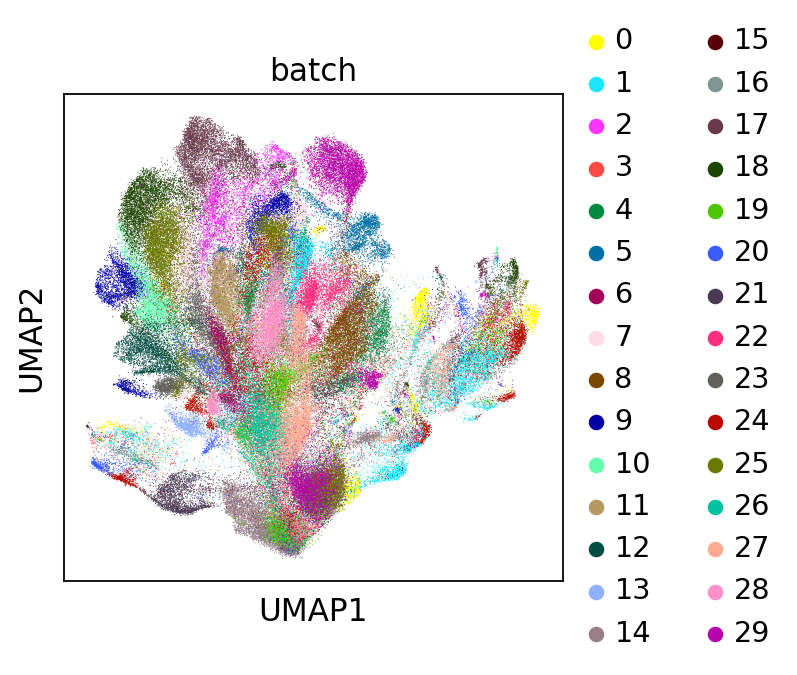

In [319]:
sc.pl.umap(mdata_prot, color=['batch'])

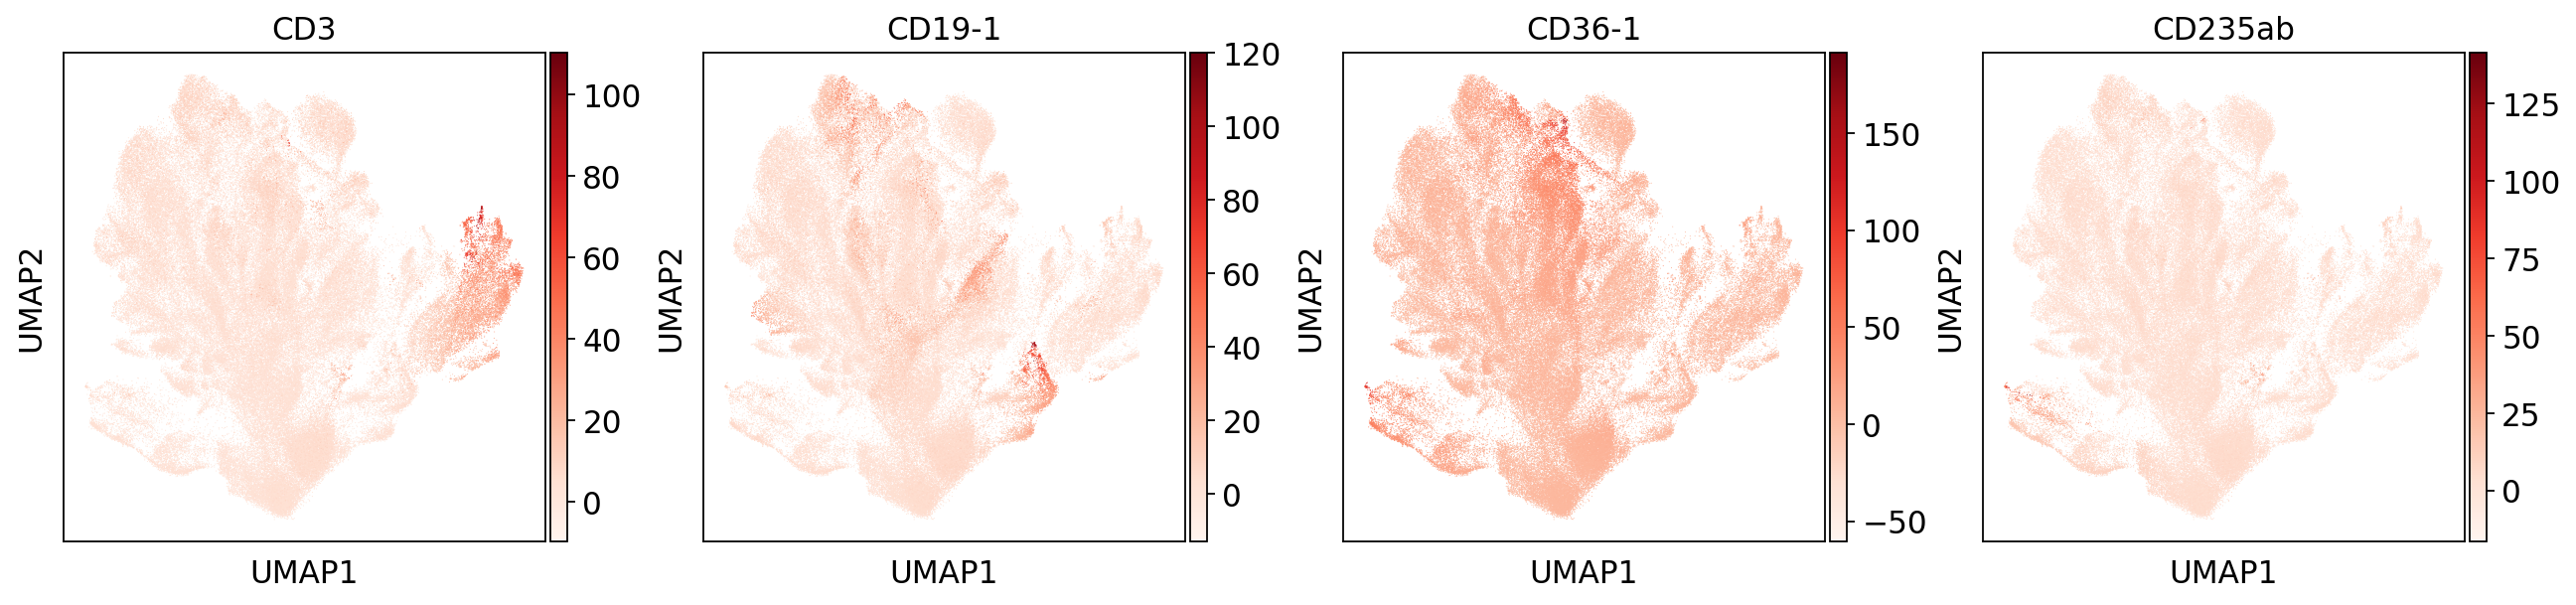

In [320]:
sc.pl.umap(mdata_prot, color=['CD3', 'CD19-1','CD36-1','CD235ab'],cmap='Reds')

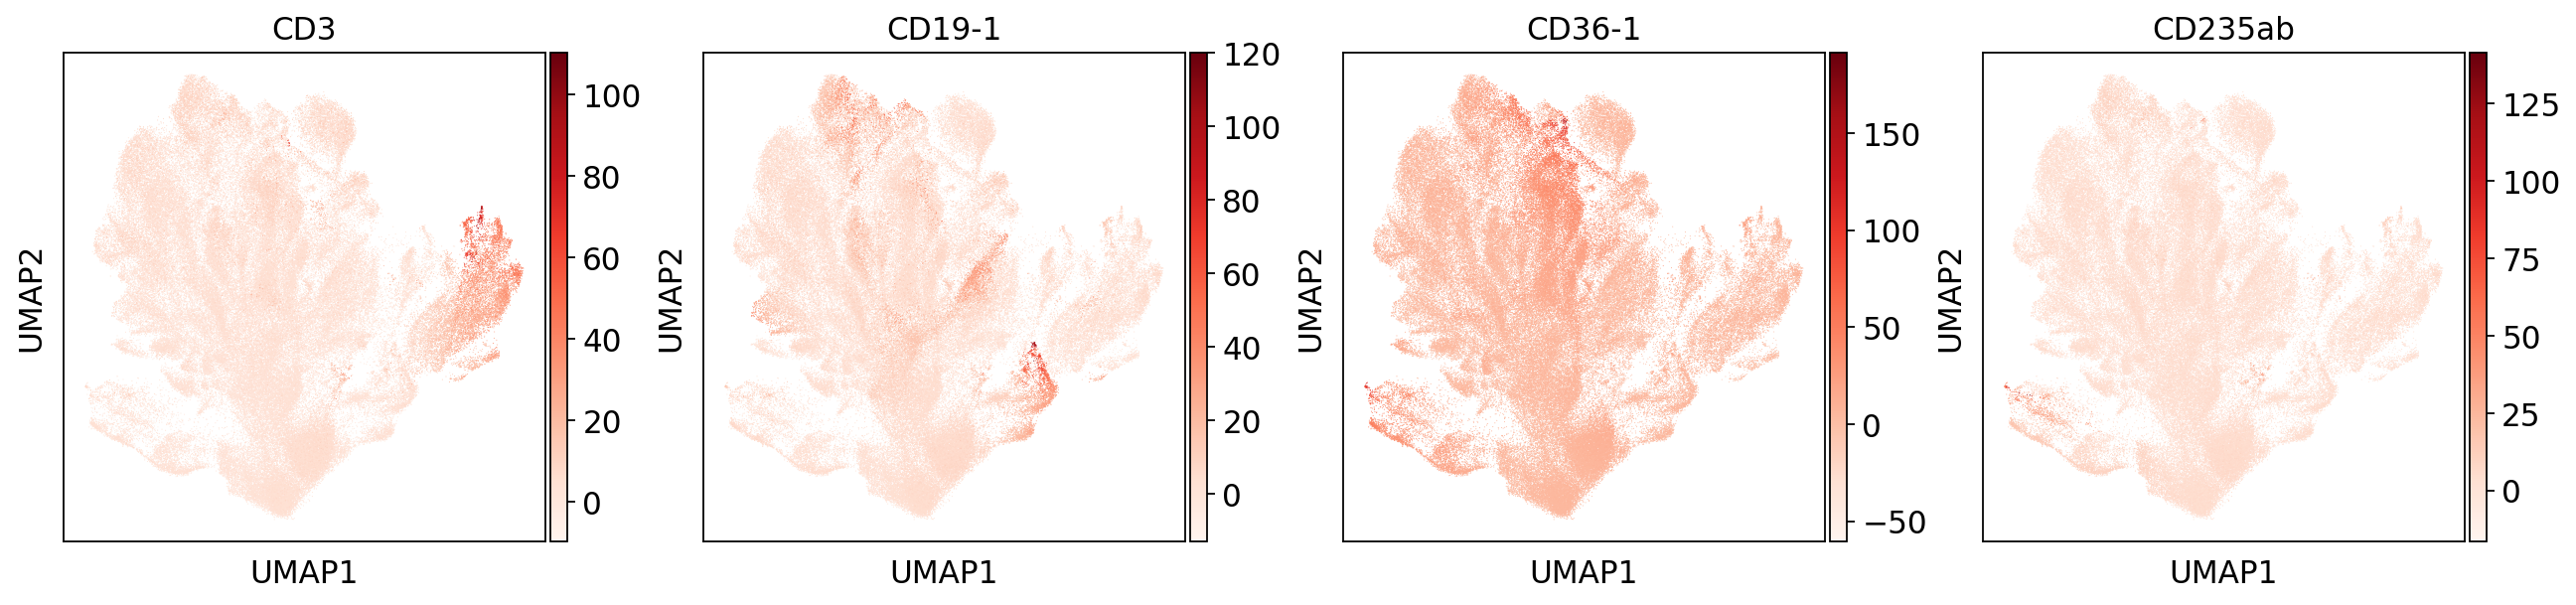

In [321]:
sc.pl.umap(mdata_prot, color=['CD3', 'CD19-1','CD36-1','CD235ab'],cmap='Reds')

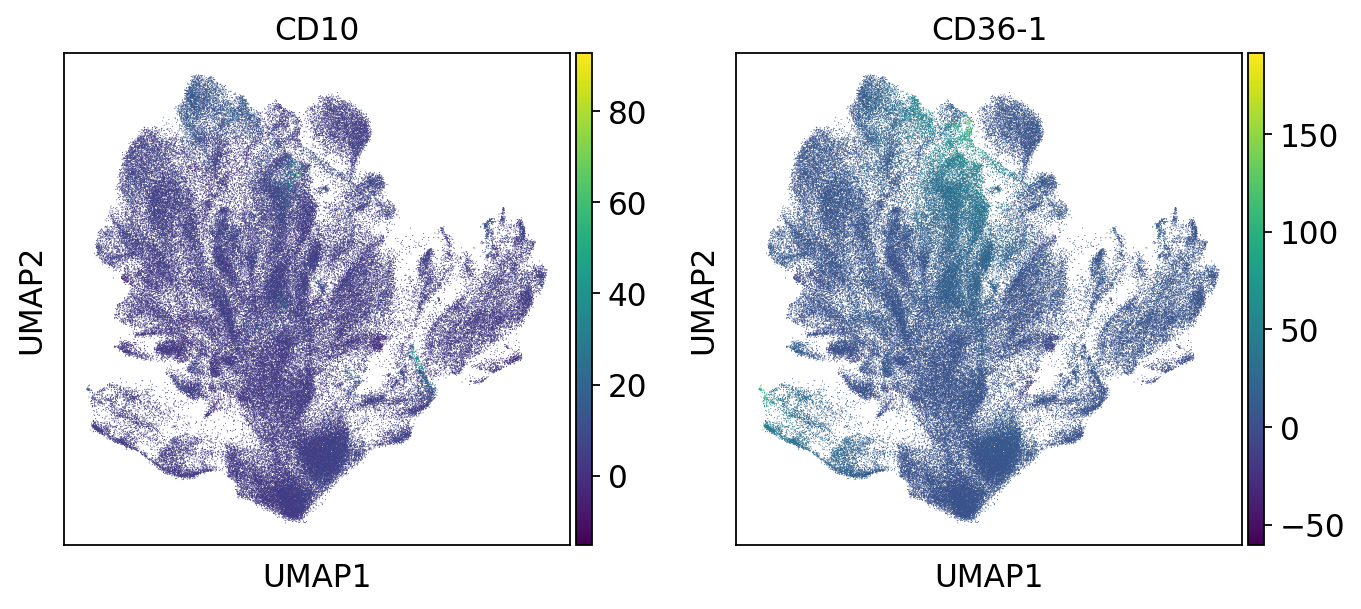

In [322]:
sc.pl.umap(mdata_prot, color=['CD10', 'CD36-1'])

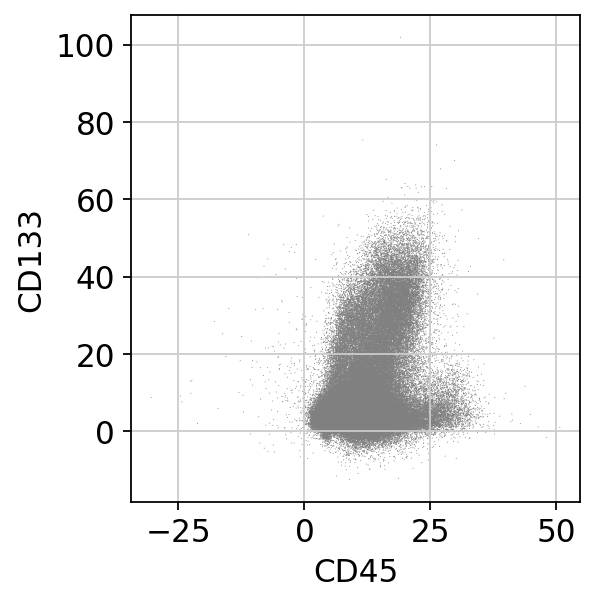

In [323]:
sc.pl.scatter(mdata_prot, x="CD45", y="CD133")

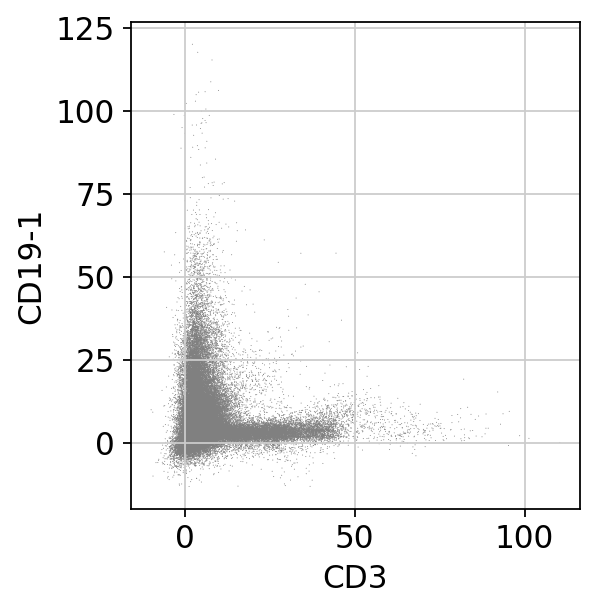

In [324]:
sc.pl.scatter(mdata_prot, x="CD3", y="CD19-1")

In [260]:
file_path='/oak/stanford/groups/cgawad/Cancer_Studies/SC_RNA_SEQ/ALSF_AML/scanpy/H5AD/'

In [325]:
mdata_prot.write(file_path + "ALSF_AML_total_protein.h5ad")

In [326]:
mdata_prot

AnnData object with n_obs × n_vars = 151921 × 21
    obs: 'CD19_pos', 'CD274_pos', 'CD3_pos', 'CD33_pos', 'CD90_pos', 'CD10_pos', 'CD45RA_pos', 'CD123_pos', 'CD7_pos', 'CD49f_pos', 'CD25_pos', 'CD279_pos', 'CD32_pos', 'CD152_pos', 'CD366_pos', 'CD235ab_pos', 'CD127_pos', 'CD71_pos', 'CD36_pos', 'CD133_pos', 'batch', 'Sample', 'FAB', 'SampleID'
    var: 'gene_ids', 'feature_types'
    uns: 'pca', 'neighbors', 'umap', 'batch_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [327]:
Cell_count1=pd.DataFrame(mdata_prot.obs['CD19_pos'])
Cell_count2=pd.DataFrame(mdata_prot.obs['CD274_pos'])
Cell_count3=pd.DataFrame(mdata_prot.obs['CD3_pos'])
Cell_count4=pd.DataFrame(mdata_prot.obs['CD33_pos'])
Cell_count5=pd.DataFrame(mdata_prot.obs['CD90_pos'])
Cell_count6=pd.DataFrame(mdata_prot.obs['CD10_pos'])
Cell_count7=pd.DataFrame(mdata_prot.obs['CD45RA_pos'])
Cell_count8=pd.DataFrame(mdata_prot.obs['CD123_pos'])
Cell_count9=pd.DataFrame(mdata_prot.obs['CD7_pos'])
Cell_count10=pd.DataFrame(mdata_prot.obs['CD49f_pos'])
Cell_count11=pd.DataFrame(mdata_prot.obs['CD25_pos'])
Cell_count12=pd.DataFrame(mdata_prot.obs['CD279_pos'])
Cell_count13=pd.DataFrame(mdata_prot.obs['CD32_pos'])
Cell_count14=pd.DataFrame(mdata_prot.obs['CD152_pos'])
Cell_count15=pd.DataFrame(mdata_prot.obs['CD366_pos'])
Cell_count16=pd.DataFrame(mdata_prot.obs['CD235ab_pos'])
Cell_count17=pd.DataFrame(mdata_prot.obs['CD127_pos'])
Cell_count18=pd.DataFrame(mdata_prot.obs['CD71_pos'])
Cell_count19=pd.DataFrame(mdata_prot.obs['CD36_pos'])
Cell_count20=pd.DataFrame(mdata_prot.obs['CD133_pos'])


Cell_count_batch=pd.DataFrame(mdata_prot.obs['Sample'])
Cell_sum=Cell_count_batch.join(Cell_count1).join(Cell_count2).join(Cell_count3).join(Cell_count4).join(Cell_count5)
Cell_sum=Cell_sum.join(Cell_count6).join(Cell_count7).join(Cell_count8).join(Cell_count9).join(Cell_count10)
Cell_sum=Cell_sum.join(Cell_count11).join(Cell_count12).join(Cell_count13).join(Cell_count14).join(Cell_count15)
Cell_sum=Cell_sum.join(Cell_count16).join(Cell_count17).join(Cell_count18).join(Cell_count19).join(Cell_count20)

In [328]:
Cell_sum

Sample  CD19_pos  CD274_pos  CD3_pos  \
AAACCTGAGACAGAGA-1-0           0_HealthyBM1         0          0        0   
AAACCTGAGGATGCGT-1-0           0_HealthyBM1         0          0        0   
AAACCTGAGTCCTCCT-1-0           0_HealthyBM1         0          0        0   
AAACCTGCAATGGAAT-1-0           0_HealthyBM1         0          0        0   
AAACCTGCAATGGTCT-1-0           0_HealthyBM1         0          0        0   
...                                     ...       ...        ...      ...   
TTTGTCAGTGCAACGA-1-29  AML4363-MPAL-BCR/ABL         0          0        0   
TTTGTCATCGGACAAG-1-29  AML4363-MPAL-BCR/ABL         0          0        0   
TTTGTCATCGGTCTAA-1-29  AML4363-MPAL-BCR/ABL         0          0        0   
TTTGTCATCTATCCTA-1-29  AML4363-MPAL-BCR/ABL         0          0        0   
TTTGTCATCTTTAGGG-1-29  AML4363-MPAL-BCR/ABL         0          0        0   

                       CD33_pos  CD90_pos  CD10_pos  CD45RA_pos  CD123_pos  \
AAACCTGAGACAGAGA-1-0          1         0         0           0          1   
AAACCTGAGGATGCGT-1-0          1         0         0           0          1   
AAACCTGAGTCCTCCT-1-0          0         0         0           1          0   
AAACCTGCAATGGAAT-1-0          0         0         0           0          0   
AAACCTGCAATGGTCT-1-0          0         0         0           1          0   
...                         ...       ...       ...         ...        ...   
TTTGTCAGTGCAACGA-1-29         0         0         0           1          1   
TTTGTCATCGGACAAG-1-29         0         0         0           1          1   
TTTGTCATCGGTCTAA-1-29         0         0         0           1          1   
TTTGTCATCTATCCTA-1-29         1         0         0           1          1   
TTTGTCATCTTTAGGG-1-29         0         0         0           1          1   

                       CD7_pos  ...  CD25_pos  CD279_pos  CD32_pos  CD152_pos  \
AAACCTGAGACAGAGA-1-0         0  ...         0          0         0          0   
AAACCTGAGGATGCGT-1-0         0  ...         0          0         0          0   
AAACCTGAGTCCTCCT-1-0         1  ...         0          0         0          0   
AAACCTGCAATGGAAT-1-0         0  ...         0          0         0          0   
AAACCTGCAATGGTCT-1-0         1  ...         0          0         0          0   
...                        ...  ...       ...        ...       ...        ...   
TTTGTCAGTGCAACGA-1-29        1  ...         0          0         1          0   
TTTGTCATCGGACAAG-1-29        1  ...         0          0         0          0   
TTTGTCATCGGTCTAA-1-29        1  ...         0          0         1          0   
TTTGTCATCTATCCTA-1-29        1  ...         0          0         1          0   
TTTGTCATCTTTAGGG-1-29        1  ...         0          0         1          0   

                       CD366_pos  CD235ab_pos  CD127_pos  CD71_pos  CD36_pos  \
AAACCTGAGACAGAGA-1-0           0            0          0         0         1   
AAACCTGAGGATGCGT-1-0           0            0          0         0         1   
AAACCTGAGTCCTCCT-1-0           0            0          0         0         0   
AAACCTGCAATGGAAT-1-0           0            0          0         0         0   
AAACCTGCAATGGTCT-1-0           0            0          0         0         0   
...                          ...          ...        ...       ...       ...   
TTTGTCAGTGCAACGA-1-29          0            0          0         1         0   
TTTGTCATCGGACAAG-1-29          0            0          0         1         0   
TTTGTCATCGGTCTAA-1-29          0            0          0         1         0   
TTTGTCATCTATCCTA-1-29          0            0          0         1         0   
TTTGTCATCTTTAGGG-1-29          0            0          0         1         0   

                       CD133_pos  
AAACCTGAGACAGAGA-1-0           0  
AAACCTGAGGATGCGT-1-0           0  
AAACCTGAGTCCTCCT-1-0           0  
AAACCTGCAATGGAAT-1-0           0  
AAACCTGCAATGGTCT-1-0           0  
...                          ..

In [329]:
total=Cell_sum.groupby(['Sample']).size().to_frame('Total')

In [330]:
Count=Cell_sum.groupby(['Sample']).sum()

In [331]:
total

Total
Sample                               
0_HealthyBM1                     5307
0_HealthyBM2                     9131
AML335-M5a-FLT3/ITD              4917
AML647-M4-del7q                  3097
AML882-MPAL-t(7;14)(q21;q32)     7885
AML948-M2-FLT3/ITD               3264
AML1355-M3-PML/RARA              4488
AML3082-M4Eo-CBFB/MYH11          4556
AML3121-MPAL-t(2;3)(p15;q26.2)   6083
AML3210-M5a-MLLr                 5011
AML3371-M5b-FLT3/ITD-Tri(15)     3532
AML3492-M3-PML/RARA              4017
AML4000-M2-MLLr                  4943
AML4010-FLT3/ITD                 1500
AML4035-M6-MYB/GATA1             6164
AML4048-M5-MLLr                   440
AML4062-CBFB/MYH11               2573
AML4068-M5b-FLT3/TKD             5557
AML4090-M1-Tri(8)/MLLr           6140
AML4102-M1-RUNX1/RUNX1T1         6275
AML4116-M1-NUP98/NSD1            3240
AML4127-Tri(8)                   3902
AML4192-M5a-Tri(8)/MLLr          4629
AML4226-M2-NRAS(G12D)            5556
AML4232-M2-RUNX1/RUNX1T1         5822
AML4239-M5a-CBFB/MYH11           9094
AML4264-RUNX1/RUNX1T1            4092
AML4271-CBFB/MYH11               7730
AML4304-M2-MLLr                  4438
AML4363-MPAL-BCR/ABL             8538

In [332]:
Count

CD19_pos  CD274_pos  CD3_pos  CD33_pos  \
Sample                                                                   
0_HealthyBM1                         271         50      930      1845   
0_HealthyBM2                        1806         41     3204      2880   
AML335-M5a-FLT3/ITD                 1293         25       46      4355   
AML647-M4-del7q                       19         11       74      1322   
AML882-MPAL-t(7;14)(q21;q32)          74         52      110      3315   
AML948-M2-FLT3/ITD                    35         20       52      3015   
AML1355-M3-PML/RARA                   55         13       99      3056   
AML3082-M4Eo-CBFB/MYH11              133         73      200      3626   
AML3121-MPAL-t(2;3)(p15;q26.2)      2605        114       20       923   
AML3210-M5a-MLLr                      72         81       43      4771   
AML3371-M5b-FLT3/ITD-Tri(15)           5         18       57      3412   
AML3492-M3-PML/RARA                  454         55       17      3665   
AML4000-M2-MLLr                     1325         35       76       193   
AML4010-FLT3/ITD                       6          2       37       492   
AML4035-M6-MYB/GATA1                 679         16      224       332   
AML4048-M5-MLLr                       28          8        1        67   
AML4062-CBFB/MYH11                   211         46      652      1233   
AML4068-M5b-FLT3/TKD                 705         20      274      5143   
AML4090-M1-Tri(8)/MLLr                41         35      550      4549   
AML4102-M1-RUNX1/RUNX1T1            2108         33      478      1263   
AML4116-M1-NUP98/NSD1                 94         40      527      1696   
AML4127-Tri(8)                        27         10      516       875   
AML4192-M5a-Tri(8)/MLLr               52         27      284      3892   
AML4226-M2-NRAS(G12D)                 45        133      139      3307   
AML4232-M2-RUNX1/RUNX1T1             701         25     1553      2715   
AML4239-M5a-CBFB/MYH11                84        156      326      5880   
AML4264-RUNX1/RUNX1T1               2067         11      368      3142   
AML4271-CBFB/MYH11                   187         16      810      1581   
AML4304-M2-MLLr                       54          2       75      4102   
AML4363-MPAL-BCR/ABL                  10        102       86      1331   

                                CD90_pos  CD10_pos  CD45RA_pos  CD123_pos  \
Sample                                                                      
0_HealthyBM1                          68       208        2568       1627   
0_HealthyBM2                          21        24        4150       1150   
AML335-M5a-FLT3/ITD                   32        46        4402       4398   
AML647-M4-del7q                       29        29         269       1222   
AML882-MPAL-t(7;14)(q21;q32)           7       132        4261       3107   
AML948-M2-FLT3/ITD                     6        24        2310       2977   
AML1355-M3-PML/RARA                   11         4         409       3168   
AML3082-M4Eo-CBFB/MYH11               63       136        3107       2761   
AML3121-MPAL-t(2;3)(p15;q26.2)        53        85        6042       5450   
AML3210-M5a-MLLr                      12       324         258       4744   
AML3371-M5b-FLT3/ITD-Tri(15)          11         1        3260       2697   
AML3492-M3-PML/RARA                   61        14        3722       3604   
AML4000-M2-MLLr                        8        47        4085       4084   
AML4010-FLT3/ITD                       1        53          40        915   
AML4035-M6-MYB/GATA1                   6       221        1152         70   
AML4048-M5-MLLr                        2         2          21         33   
AML4062-CBFB/MYH11                    37         8         832        514   
AML4068-M5b-FLT3/TKD                  11       107        5233       4567   
AML4090-M1-Tri(8)/MLLr                28        68        5664       5240   
AML4102-M1-RUNX1/RUNX1T1              14      

In [333]:
data=total.join(Count)

In [334]:
data.to_csv('ALSF_scCSF_summarize.csv')
data

Total  CD19_pos  CD274_pos  CD3_pos  CD33_pos  \
Sample                                                                          
0_HealthyBM1                     5307       271         50      930      1845   
0_HealthyBM2                     9131      1806         41     3204      2880   
AML335-M5a-FLT3/ITD              4917      1293         25       46      4355   
AML647-M4-del7q                  3097        19         11       74      1322   
AML882-MPAL-t(7;14)(q21;q32)     7885        74         52      110      3315   
AML948-M2-FLT3/ITD               3264        35         20       52      3015   
AML1355-M3-PML/RARA              4488        55         13       99      3056   
AML3082-M4Eo-CBFB/MYH11          4556       133         73      200      3626   
AML3121-MPAL-t(2;3)(p15;q26.2)   6083      2605        114       20       923   
AML3210-M5a-MLLr                 5011        72         81       43      4771   
AML3371-M5b-FLT3/ITD-Tri(15)     3532         5         18       57      3412   
AML3492-M3-PML/RARA              4017       454         55       17      3665   
AML4000-M2-MLLr                  4943      1325         35       76       193   
AML4010-FLT3/ITD                 1500         6          2       37       492   
AML4035-M6-MYB/GATA1             6164       679         16      224       332   
AML4048-M5-MLLr                   440        28          8        1        67   
AML4062-CBFB/MYH11               2573       211         46      652      1233   
AML4068-M5b-FLT3/TKD             5557       705         20      274      5143   
AML4090-M1-Tri(8)/MLLr           6140        41         35      550      4549   
AML4102-M1-RUNX1/RUNX1T1         6275      2108         33      478      1263   
AML4116-M1-NUP98/NSD1            3240        94         40      527      1696   
AML4127-Tri(8)                   3902        27         10      516       875   
AML4192-M5a-Tri(8)/MLLr          4629        52         27      284      3892   
AML4226-M2-NRAS(G12D)            5556        45        133      139      3307   
AML4232-M2-RUNX1/RUNX1T1         5822       701         25     1553      2715   
AML4239-M5a-CBFB/MYH11           9094        84        156      326      5880   
AML4264-RUNX1/RUNX1T1            4092      2067         11      368      3142   
AML4271-CBFB/MYH11               7730       187         16      810      1581   
AML4304-M2-MLLr                  4438        54          2       75      4102   
AML4363-MPAL-BCR/ABL             8538        10        102       86      1331   

                                CD90_pos  CD10_pos  CD45RA_pos  CD123_pos  \
Sample                                                                      
0_HealthyBM1                          68       208        2568       1627   
0_HealthyBM2                          21        24        4150       1150   
AML335-M5a-FLT3/ITD                   32        46        4402       4398   
AML647-M4-del7q                       29        29         269       1222   
AML882-MPAL-t(7;14)(q21;q32)           7       132        4261       3107   
AML948-M2-FLT3/ITD                     6        24        2310       2977   
AML1355-M3-PML/RARA                   11         4         409       3168   
AML3082-M4Eo-CBFB/MYH11               63       136        3107       2761   
AML3121-MPAL-t(2;3)(p15;q26.2)        53        85        6042       5450   
AML3210-M5a-MLLr                      12       324         258       4744   
AML3371-M5b-FLT3/ITD-Tri(15)          11         1        3260       2697   
AML3492-M3-PML/RARA                   61        14        3722       3604   
AML4000-M2-MLLr                        8        47        4085       4084   
AML4010-FLT3/ITD                       1        53          40        915   
AML4035-M6-MYB/GATA1                   6       221        1152         70   
AML4048-M5-MLLr                        2         2          21         33   
AML4062-CBFB/MYH11                    37         8   

In [18]:
Antibody_list=[
'CD274-1',
'CD45',
'CD3',
'CD19-1',
'CD33-1',
'CD90',
'CD10',
'CD45RA',
'CD123',
'CD7-1',
'CD49f',
'CD25',
'CD279',
'CD32',
'CD152',
'CD366',
'CD235ab',
'CD127',
'CD71',
'CD36-1',
'CD133',]

In [192]:
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(-5, 50, 5)
minor_ticks = np.arange(-5, 50, 1)

In [ ]:
file_path='/oak/stanford/groups/cgawad/Cancer_Studies/SC_RNA_SEQ/ALSF_AML/scanpy/H5AD/'

In [ ]:
mdata_prot=sc.read_h5ad(file_path +"ALSF_AML_total_protein.h5ad")

In [390]:
SampleID='AML3492'

In [391]:
AML=mdata_prot[mdata_prot.obs['SampleID'].isin([SampleID]),:]

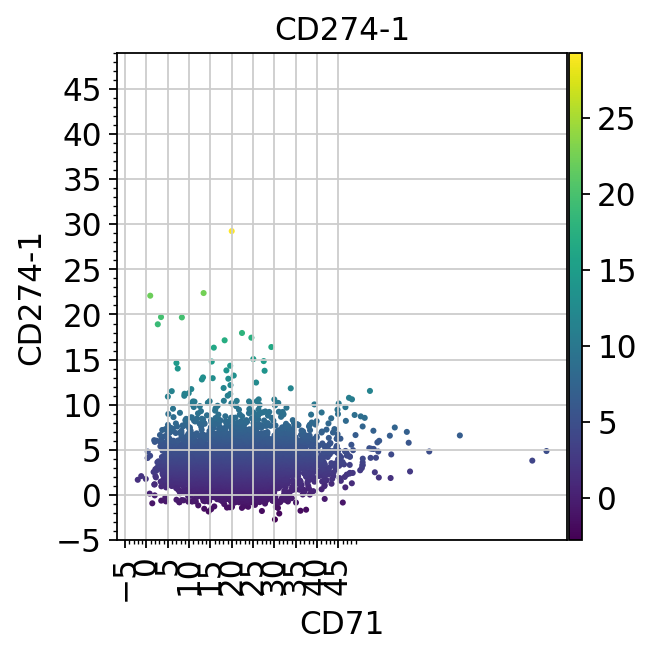

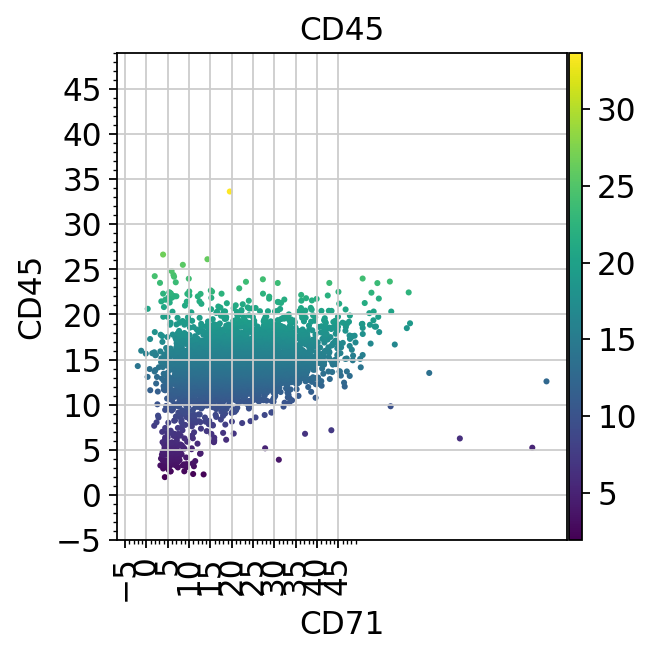

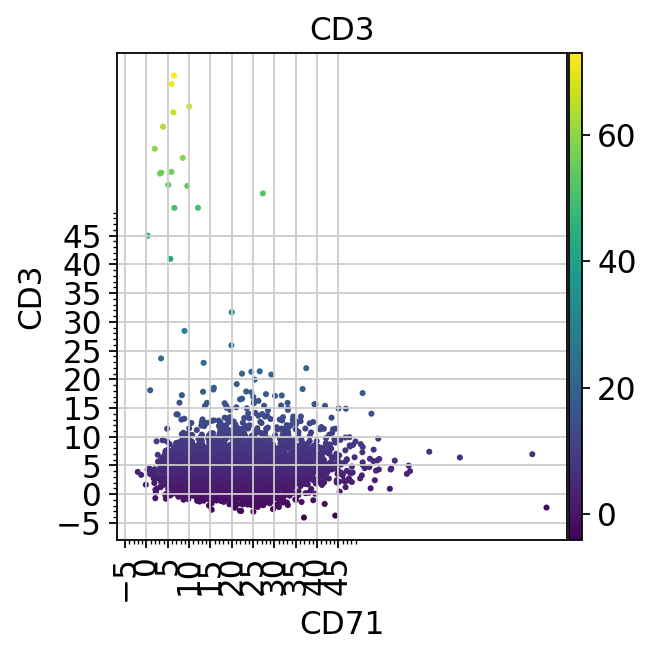

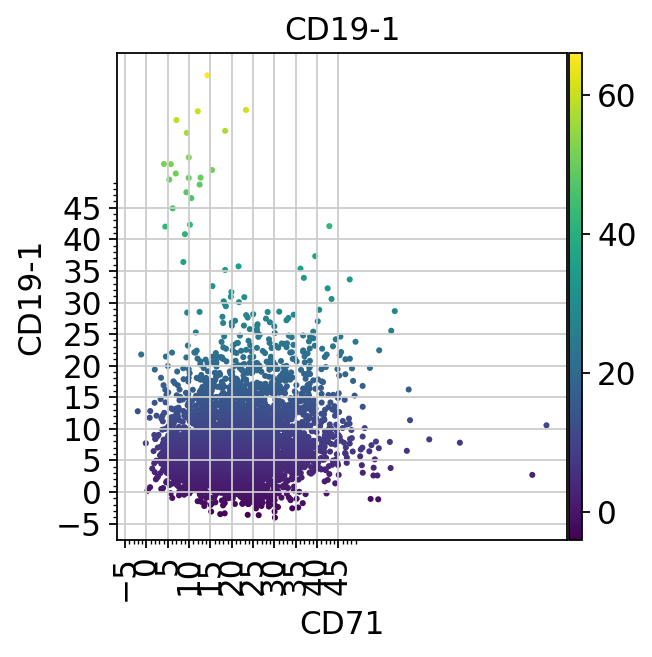

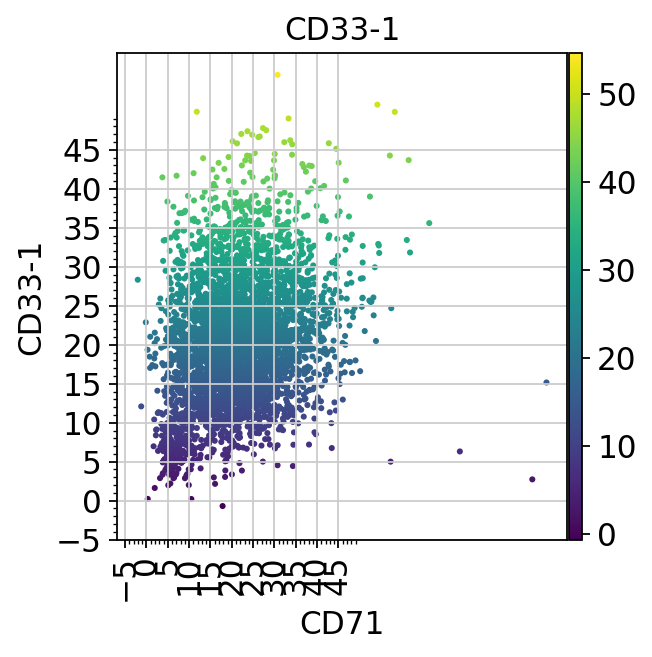

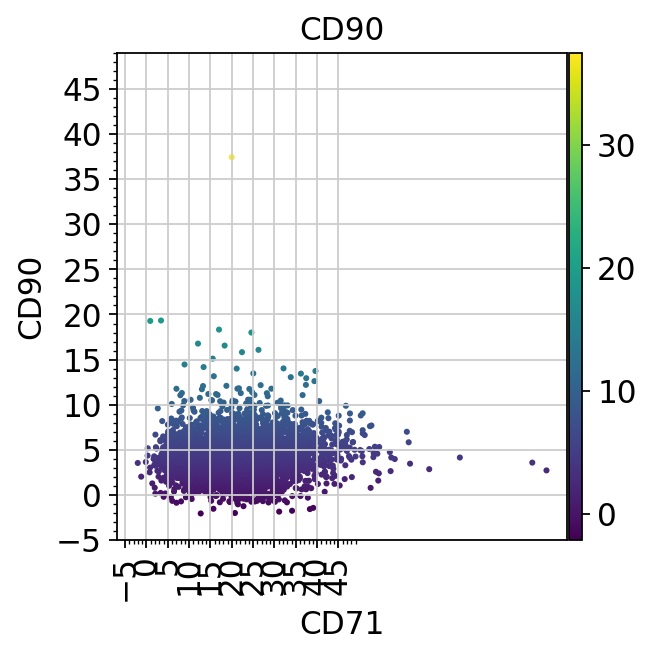

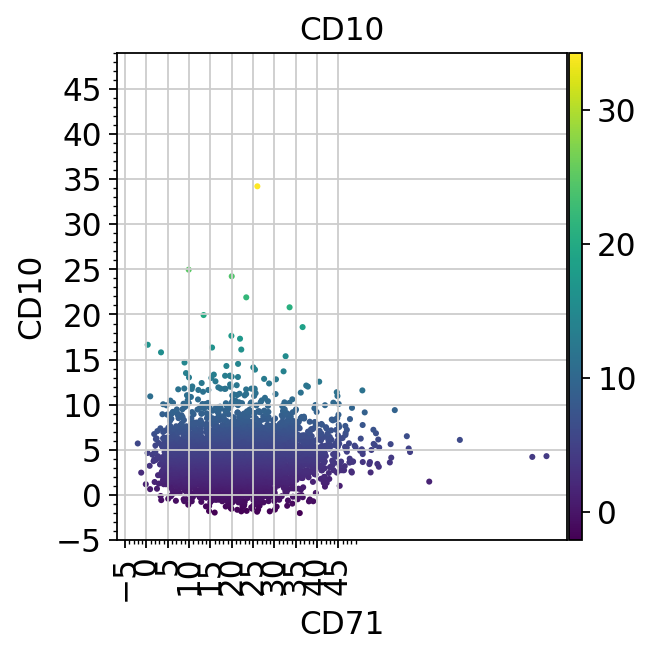

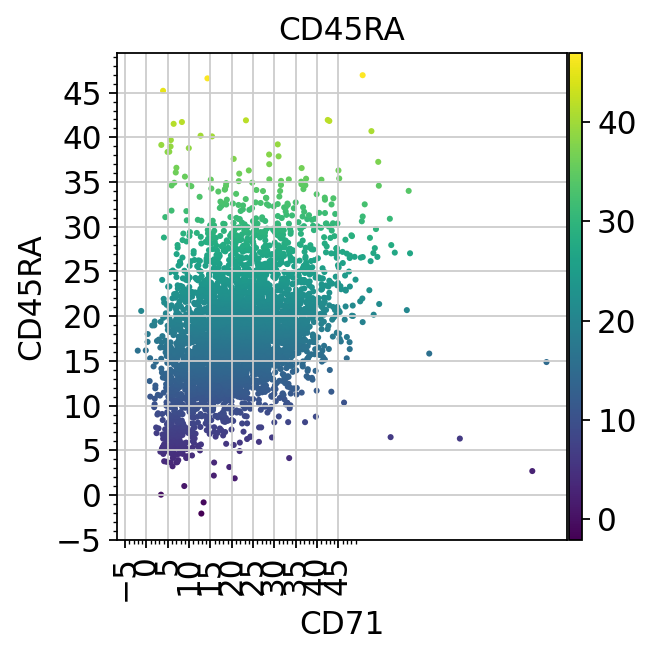

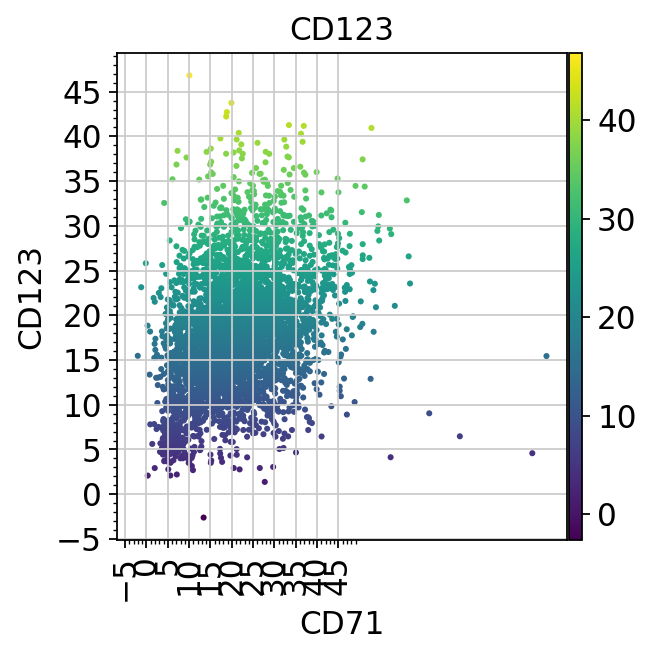

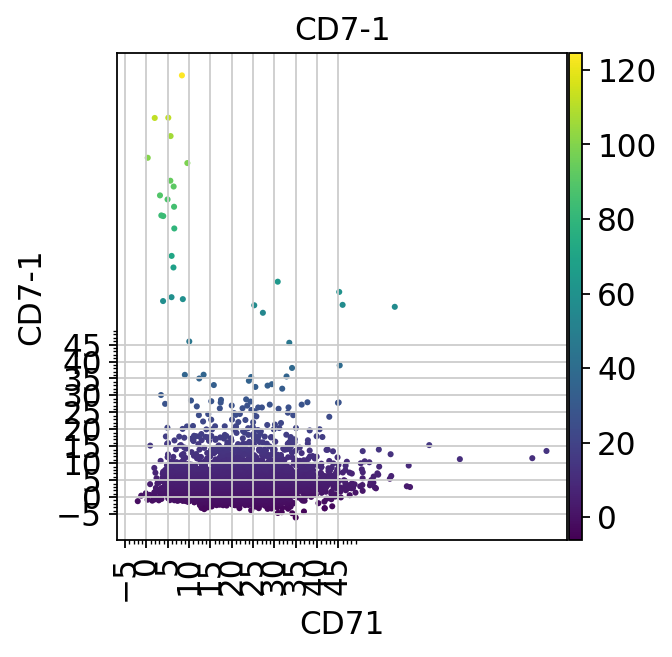

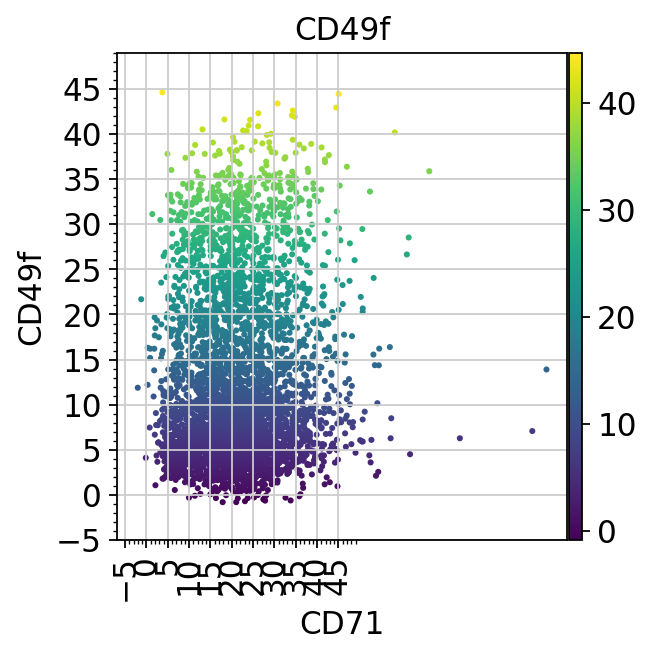

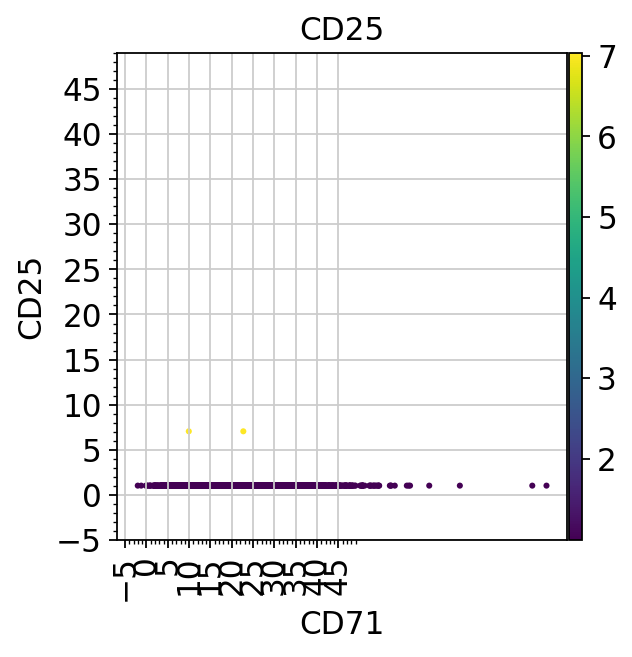

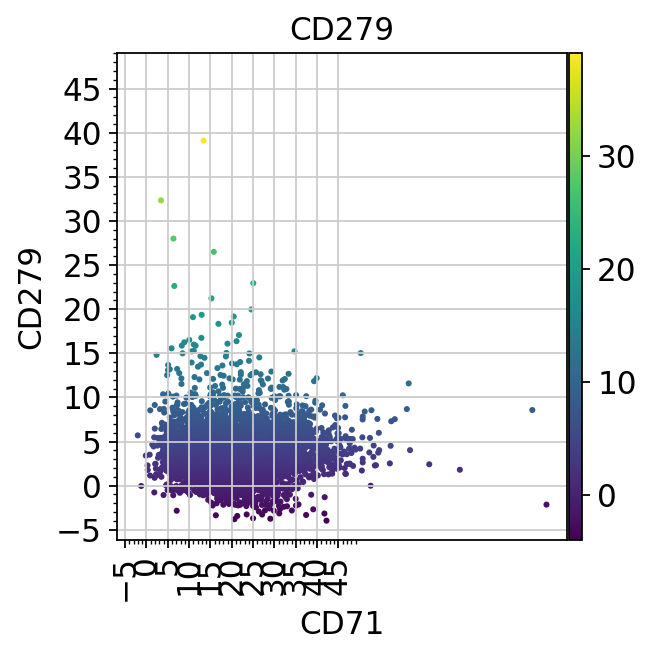

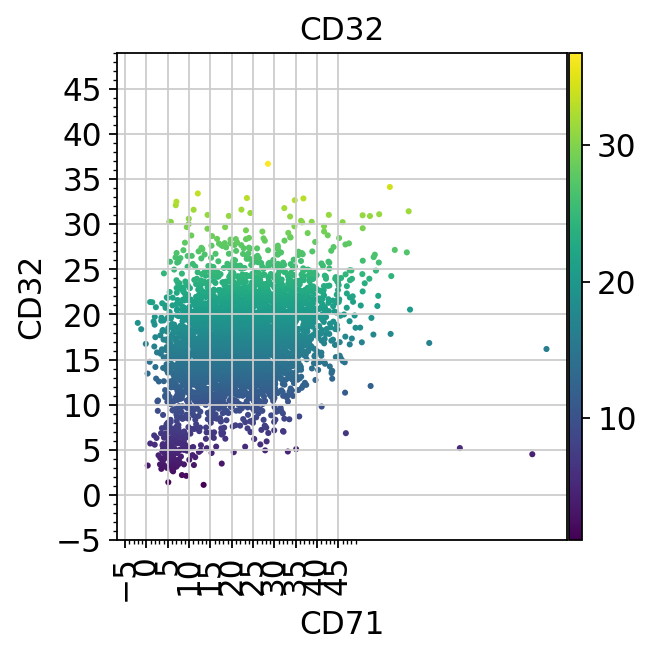

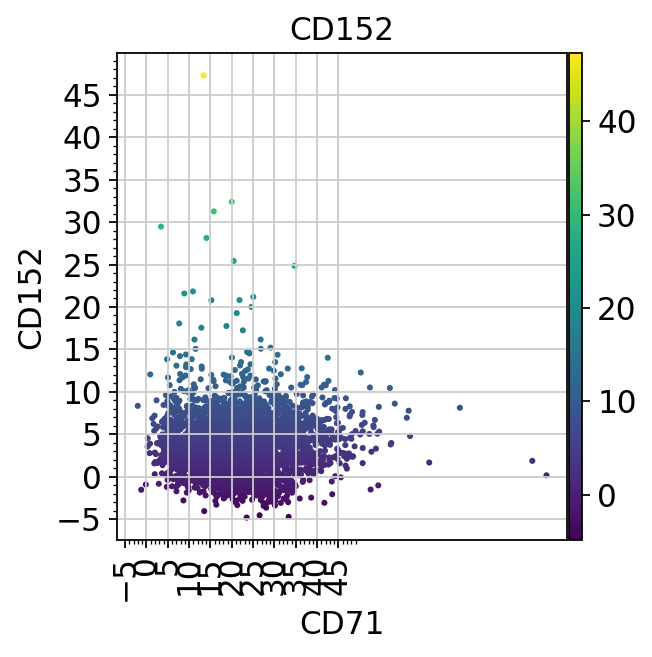

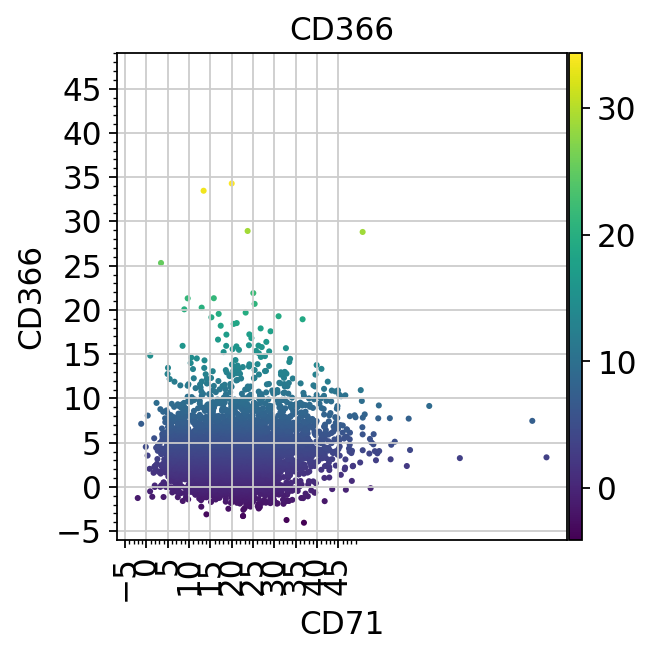

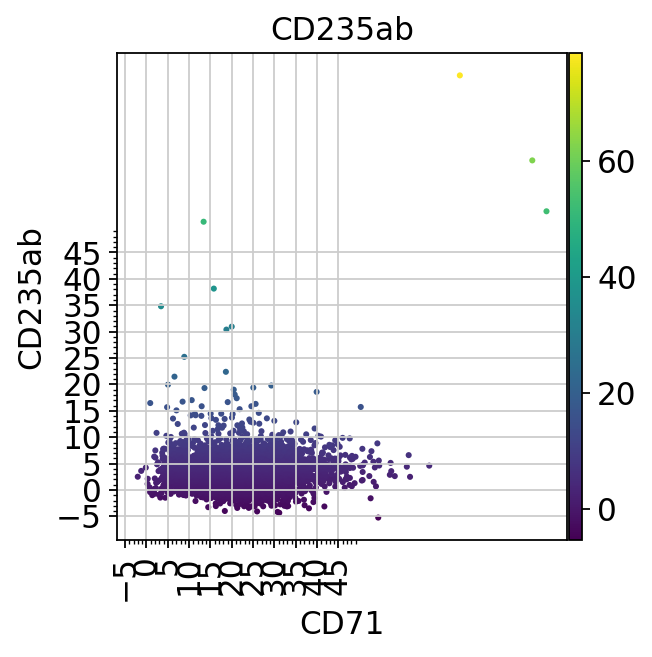

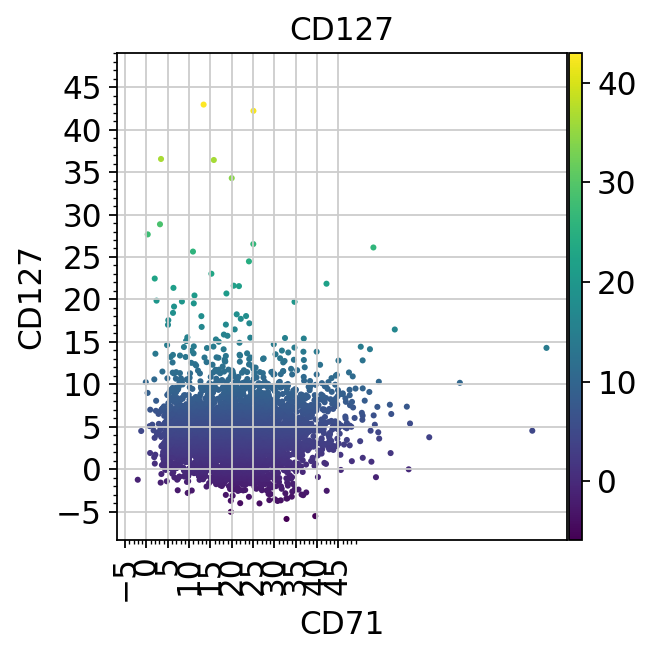

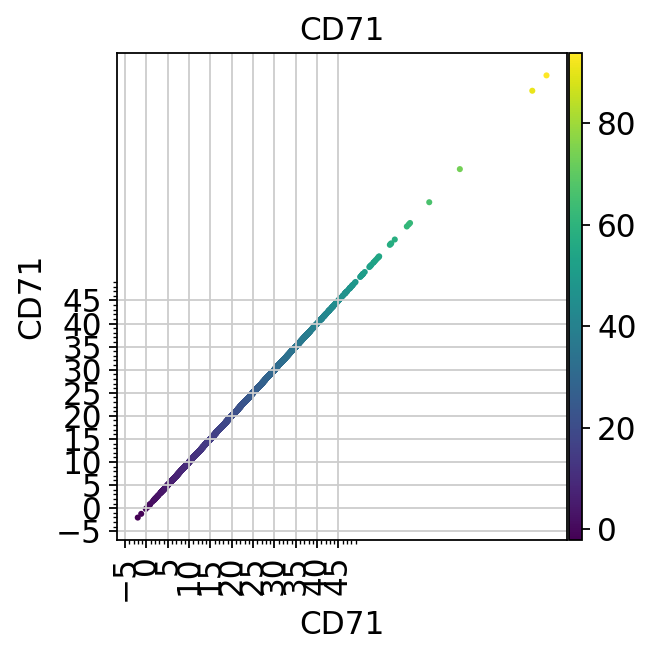

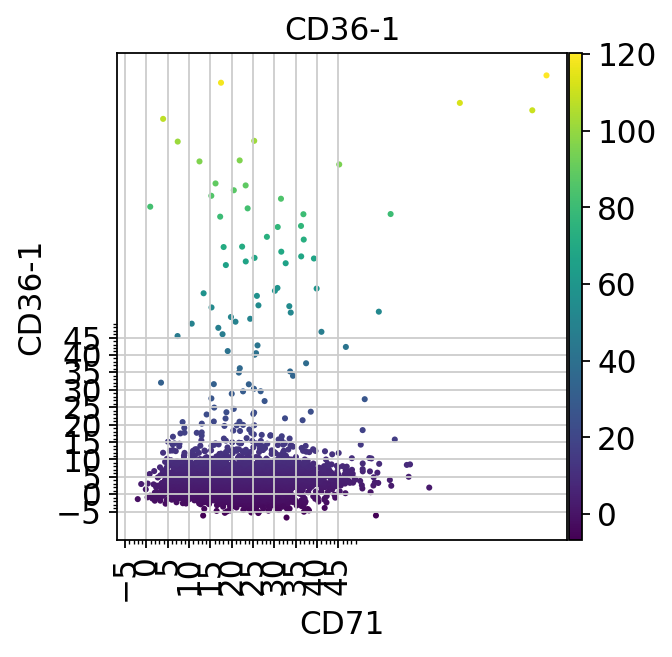

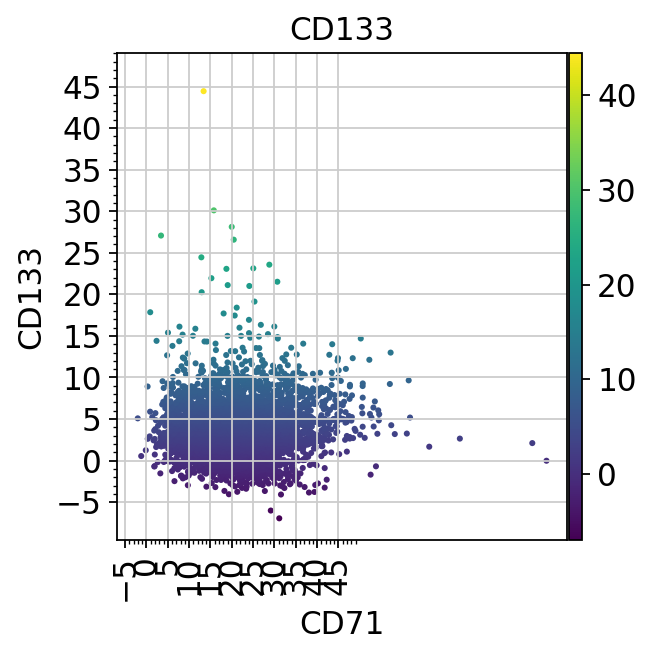

In [399]:
for marker in Antibody_list:
    ax=sc.pl.scatter(AML, x="CD71", y=marker, color=marker, show=False)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor = True)
    for label in ax.get_xticklabels():
        #label.set_ha("right")
        label.set_rotation(90)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor = True)